In [68]:
def flat_table(lst, end):
    result = []
    for table in lst[:end]:
        result.extend(table)
    return result

In [41]:
CONFIG_PATH = "/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random/ann_cd2.json"
with open(CONFIG_PATH) as fin:
    config = json.load(fin)
mp_probs = fvecs_read_non_uniform(config["mp prob filename"])[1]

In [42]:
mp_probs[int(1.4 / 1.75 * 10000)]

0.032070573

In [51]:
arr = np.array([len(x) for x in candidate_tables])
len(arr[arr>0])

26

In [72]:
cf = flat_table(candidate_tables, 33)
cf2 = flat_table(candidate_tables2, 33)
len(set(cf)), len(cf2)

(695832, 632045)

In [73]:
def export_data(query, config):
    CONFIG_PATH = "/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random/ann_cd.json"
    if config is not None:
        CONFIG_PATH = config
    l = 17
    with open(CONFIG_PATH) as fin:
        config = json.load(fin)
    candidate_file = config["candidate filename"] + "_q_{}.bin".format(query)
    with open(candidate_file, "rb") as fin:
        candfile = fin.read()

    mode = struct.unpack("@B", candfile[:1])
    mode = mode[0]
    assert(mode == 0b11100000)
    length = struct.unpack("@i", candfile[1:5])
    length = length[0]
    candidates = []
    candidate_tables = []
    pointer = 5
    l_max = config["hash table parameters"][0]["l"]
    for i in range(l_max):
        candidate_tables.append([])
    with open("/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random/q0cand.txt", "w") as fout:
        for cand in range(length):
            id, table, bucket = struct.unpack("@iii", candfile[pointer: pointer + 12])
            fout.write("{}\t{}\t{}\n".format(id, table, bucket))
            pointer += 12
            if table < l  and table >= 0:
                candidates.append(id)
            candidate_tables[table].append(id)
    return candidates, candidate_tables

In [2]:
CONFIG_PATH = "/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random/ann_cd2.json"
with open(CONFIG_PATH) as fin:
    config = json.load(fin)
qh = fvecs_read(config["query hash filename"])
len(qh), qh.shape

(1000, (1000, 450))

In [80]:
len(qhi), qhi[270:279]

(450, array([ 0,  0, -1,  2,  0, -2,  0,  0,  1], dtype=int32))

In [81]:
qh[270:279]

array([ 0.22791569,  0.7587983 , -0.18685307,  2.0162477 ,  0.42184827,
       -1.5078542 ,  0.11287431,  0.60421693,  1.5440398 ], dtype=float32)

In [4]:
CONFIG_PATH = "/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random/ann_cd2.json"
with open(CONFIG_PATH) as fin:
    config = json.load(fin)
qha = fvecs_read(config["query hash filename"])
qha = (np.floor(qha)).astype(np.int32)
np.unique(qha, return_counts=True)

(array([-3, -2, -1,  0,  1,  2,  3], dtype=int32),
 array([    27,   4382,  95217, 252563,  93666,   4133,     12]))

In [7]:
CONFIG_PATH = "/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random/ann_cd2.json"
with open(CONFIG_PATH) as fin:
    config = json.load(fin)
hfuncs = fvecs_read_non_uniform(config["result filename"])
len(hfuncs), len(hfuncs[0]), len(hfuncs[-1])

(451, 128, 450)

In [8]:
bias = hfuncs[-1]
bias[270:279] / 1.75

array([0.738691  , 0.87930363, 0.6290035 , 0.90447414, 0.55103695,
       0.15198858, 0.6534945 , 0.64346296, 0.2291518 ], dtype=float32)

In [97]:
(hfuncs[270:279] @ query[49].T + bias[270:279]) / 1.75

array([ 0.22791566,  0.7587983 , -0.186853  ,  2.016248  ,  0.4218483 ,
       -1.5078543 ,  0.11287431,  0.604217  ,  1.5440398 ], dtype=float32)

In [96]:
query = fvecs_read(config["query filename"])

hfuncs[270:279] @ query[49].T

array([-0.8938568 , -0.21088433, -1.4277489 ,  1.945604  , -0.22608021,
       -2.904725  , -0.94608533, -0.06868045,  2.301054  ], dtype=float32)

In [103]:
probing_seq = ivecs_read_non_uniform(config["probing sequence file"])
probing_seq = probing_seq[5001 * 49: 5001 * 50]
len(probing_seq)

5001

In [104]:

ps = probing_seq[31: 5000: 50]
ps

[array([ 0,  0, -1,  2,  0, -2,  0,  0,  1, 30], dtype=int32),
 array([ 0,  0, -1,  1,  0, -2,  0,  0,  1, 30], dtype=int32),
 array([ 0,  0, -1,  2,  0, -2, -1,  0,  1, 30], dtype=int32),
 array([ 0,  0, -1,  1,  0, -2, -1,  0,  1, 30], dtype=int32),
 array([ 0,  0,  0,  2,  0, -2,  0,  0,  1, 30], dtype=int32),
 array([ 0,  0,  0,  1,  0, -2,  0,  0,  1, 30], dtype=int32),
 array([ 0,  0,  0,  2,  0, -2, -1,  0,  1, 30], dtype=int32),
 array([ 0,  0,  0,  1,  0, -2, -1,  0,  1, 30], dtype=int32),
 array([-1,  0, -1,  2,  0, -2,  0,  0,  1, 30], dtype=int32),
 array([-1,  0, -1,  1,  0, -2,  0,  0,  1, 30], dtype=int32),
 array([-1,  0, -1,  2,  0, -2, -1,  0,  1, 30], dtype=int32),
 array([-1,  0, -1,  1,  0, -2, -1,  0,  1, 30], dtype=int32),
 array([ 0,  1, -1,  2,  0, -2,  0,  0,  1, 30], dtype=int32),
 array([-1,  0,  0,  2,  0, -2,  0,  0,  1, 30], dtype=int32),
 array([ 0,  1, -1,  1,  0, -2,  0,  0,  1, 30], dtype=int32),
 array([-1,  0,  0,  1,  0, -2,  0,  0,  1, 30], dtype=

In [106]:
candidate_t = []
for qid in range(1000):
    _, ctables = load_data(qid, None)
    candidate_t.extend([len(x) for x in ctables])
candidate_t, len(candidate_t)

([58338,
  21759,
  26931,
  48777,
  9910,
  26673,
  22283,
  39449,
  28317,
  75870,
  14477,
  17821,
  60275,
  121812,
  51975,
  49955,
  21871,
  25684,
  90597,
  2758,
  18214,
  13352,
  18933,
  10738,
  85310,
  9696,
  40095,
  54132,
  62189,
  4995,
  6859,
  50568,
  6954,
  7309,
  20697,
  60364,
  42356,
  3035,
  9482,
  35706,
  43730,
  19992,
  5439,
  17499,
  3263,
  42075,
  32514,
  33582,
  4485,
  36129,
  5112,
  17977,
  26878,
  15798,
  3188,
  6684,
  42623,
  64824,
  1116,
  81705,
  9931,
  17613,
  26560,
  1814,
  34827,
  60888,
  5888,
  65257,
  37227,
  27731,
  28038,
  15963,
  17248,
  19466,
  86156,
  93080,
  34816,
  24712,
  32391,
  39726,
  2239,
  38804,
  35355,
  3551,
  8751,
  4024,
  21891,
  7611,
  11462,
  9078,
  948,
  9652,
  70322,
  16247,
  25779,
  686,
  33718,
  65210,
  78120,
  17103,
  5059,
  13818,
  26219,
  57429,
  39876,
  32776,
  21554,
  76086,
  30358,
  1250,
  57901,
  11113,
  43399,
  4484,
  2290

In [6]:
qh = qh.reshape((50000, 9))
qh_dist = np.linalg.norm(qh, axis=1)
qh_dist[:100], qh_dist.shape

(array([2.6017783, 1.8386511, 2.3205569, 1.7867755, 2.1529021, 2.0209618,
        2.891088 , 1.7090721, 2.5736077, 1.3678167, 2.1637235, 1.8425262,
        2.511768 , 1.8253664, 1.8113617, 2.3056695, 2.4138324, 2.0481584,
        1.2620482, 2.9398735, 2.1956506, 2.9663713, 1.5962743, 3.0461717,
        1.9416877, 3.2173119, 2.261752 , 2.190768 , 2.5923736, 3.2627165,
        2.0415645, 2.2907238, 2.7623274, 2.799576 , 2.046352 , 1.7967145,
        2.2979205, 3.3677466, 2.463287 , 2.8937228, 1.4827389, 2.6448073,
        3.1561022, 2.7997475, 2.773187 , 1.2109406, 2.5206547, 1.5459934,
        2.6593761, 2.6664233, 2.6952882, 2.653417 , 2.9481373, 1.9890711,
        2.6470594, 2.496233 , 1.6235081, 1.507542 , 3.128173 , 1.6201171,
        3.2119484, 2.760741 , 2.0257988, 3.8602502, 1.7259438, 1.9859594,
        2.8333156, 1.3984829, 1.3518339, 1.7886729, 2.582297 , 2.8490195,
        1.7094097, 2.3003545, 1.786826 , 2.4718168, 2.3387384, 2.9372652,
        2.4671574, 2.224802 , 2.332157

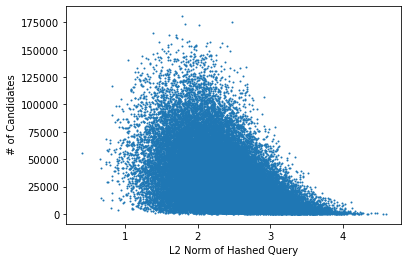

In [127]:
import matplotlib.pyplot as plt
plt.scatter(qh_dist, candidate_t, s=1)
ax = plt.gca()
ax.set_xlabel("L2 Norm of Hashed Query") 
ax.set_ylabel( " # of Candidates")
plt.show()

In [119]:
import pandas as pd
qh_frame = pd.DataFrame.from_records([qh_dist, candidate_t]).transpose()
qh_frame

,0,1
0,2.601778,58338.0
1,1.838651,21759.0
2,2.320557,26931.0
3,1.786775,48777.0
4,2.152902,9910.0
...,...,...
49995,2.328141,80133.0
49996,2.558808,16389.0
49997,1.735375,48012.0
49998,3.022709,1441.0


In [123]:
qh_mean = qh_frame.groupby([pd.cut(qh_frame[0], bins=np.arange(1, 4, 0.1))]).mean()
qh_mean

,0,1
0,,
"(1.0, 1.1]",1.055565,52591.400000
"(1.1, 1.2]",1.151152,53160.505051
"(1.2, 1.3]",1.252824,51644.958333
"(1.3, 1.4]",1.353437,48849.118908
"(1.4, 1.5]",1.452403,48727.363081
"(1.5, 1.6]",1.552849,48554.736932
"(1.6, 1.7]",1.651836,46285.195024
"(1.7, 1.8]",1.752169,46227.110997
"(1.8, 1.9]",1.852384,45771.227047


In [120]:
pd.cut(qh_frame[0], bins=np.arange(1, 4, 0.1))

0        (2.6, 2.7]
1        (1.8, 1.9]
2        (2.3, 2.4]
3        (1.7, 1.8]
4        (2.1, 2.2]
            ...    
49995    (2.3, 2.4]
49996    (2.5, 2.6]
49997    (1.7, 1.8]
49998    (3.0, 3.1]
49999    (2.6, 2.7]
Name: 0, Length: 50000, dtype: category
Categories (29, interval[float64, right]): [(1.0, 1.1] < (1.1, 1.2] < (1.2, 1.3] < (1.3, 1.4] ... (3.5, 3.6] < (3.6, 3.7] < (3.7, 3.8] < (3.8, 3.9]]

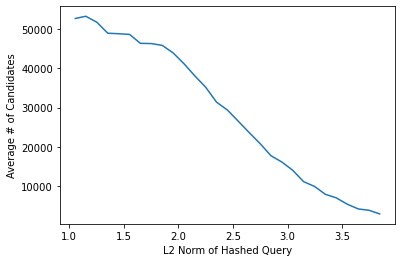

In [126]:
plt.plot(qh_mean[0], qh_mean[1])
ax = plt.gca()
ax.set_xlabel("L2 Norm of Hashed Query") 
ax.set_ylabel( "Average # of Candidates")
plt.show()

In [10]:
bias = bias.reshape(50, 9)
bias2 = bias.repeat(1000, axis=0)
bias2[0:200:50], bias2.shape

(array([[0.07331481, 1.0223721 , 0.577257  , 0.6609255 , 1.3175756 ,
         1.3298178 , 1.2280343 , 1.4034939 , 0.11191936],
        [0.07331481, 1.0223721 , 0.577257  , 0.6609255 , 1.3175756 ,
         1.3298178 , 1.2280343 , 1.4034939 , 0.11191936],
        [0.07331481, 1.0223721 , 0.577257  , 0.6609255 , 1.3175756 ,
         1.3298178 , 1.2280343 , 1.4034939 , 0.11191936],
        [0.07331481, 1.0223721 , 0.577257  , 0.6609255 , 1.3175756 ,
         1.3298178 , 1.2280343 , 1.4034939 , 0.11191936]], dtype=float32),
 (50000, 9))

In [13]:
qh2 = qh * 1.75 - bias2
qh_dist = np.linalg.norm(qh2, axis=1)
qh_dist[:100], qh_dist.shape

(array([2.6373067, 3.7294207, 2.8399127, 2.9713545, 3.6310694, 4.614086 ,
        3.6827724, 2.928643 , 3.6150212, 2.433181 , 4.0531015, 2.8004606,
        3.6003907, 3.1959014, 2.7937124, 2.7646585, 3.8881752, 2.3145957,
        2.4190824, 4.1600194, 3.3321798, 3.8800495, 3.5214796, 3.4586794,
        2.3562653, 4.3716407, 4.315299 , 3.1614358, 3.5137315, 5.2490416,
        3.2867436, 3.3337915, 4.9638276, 4.031264 , 3.4046571, 1.7548729,
        3.4250016, 4.9894443, 3.1314754, 3.9445179, 2.818932 , 3.35141  ,
        4.4435105, 4.23997  , 5.2634454, 2.7253625, 2.4259706, 3.4689798,
        5.2982683, 2.513682 , 3.7735295, 4.3673954, 3.7134128, 3.244531 ,
        4.0877495, 3.3730154, 3.2086706, 2.215747 , 5.2557774, 1.9893857,
        5.069891 , 4.072794 , 3.55564  , 5.8635845, 3.3332922, 3.7974184,
        4.465169 , 2.3876917, 4.2954645, 3.0832915, 3.1965117, 4.37946  ,
        4.141693 , 3.90319  , 2.611507 , 2.2432268, 2.9143157, 3.6458716,
        4.077194 , 3.0164845, 4.761617

In [142]:
qh_dist = np.linalg.norm(qh2, axis=1)
qh_frame = pd.DataFrame.from_records([qh_dist, candidate_t]).transpose()
qh_mean = qh_frame.groupby([pd.cut(qh_frame[0], bins=np.arange(1.5, 6, 0.1))]).mean()

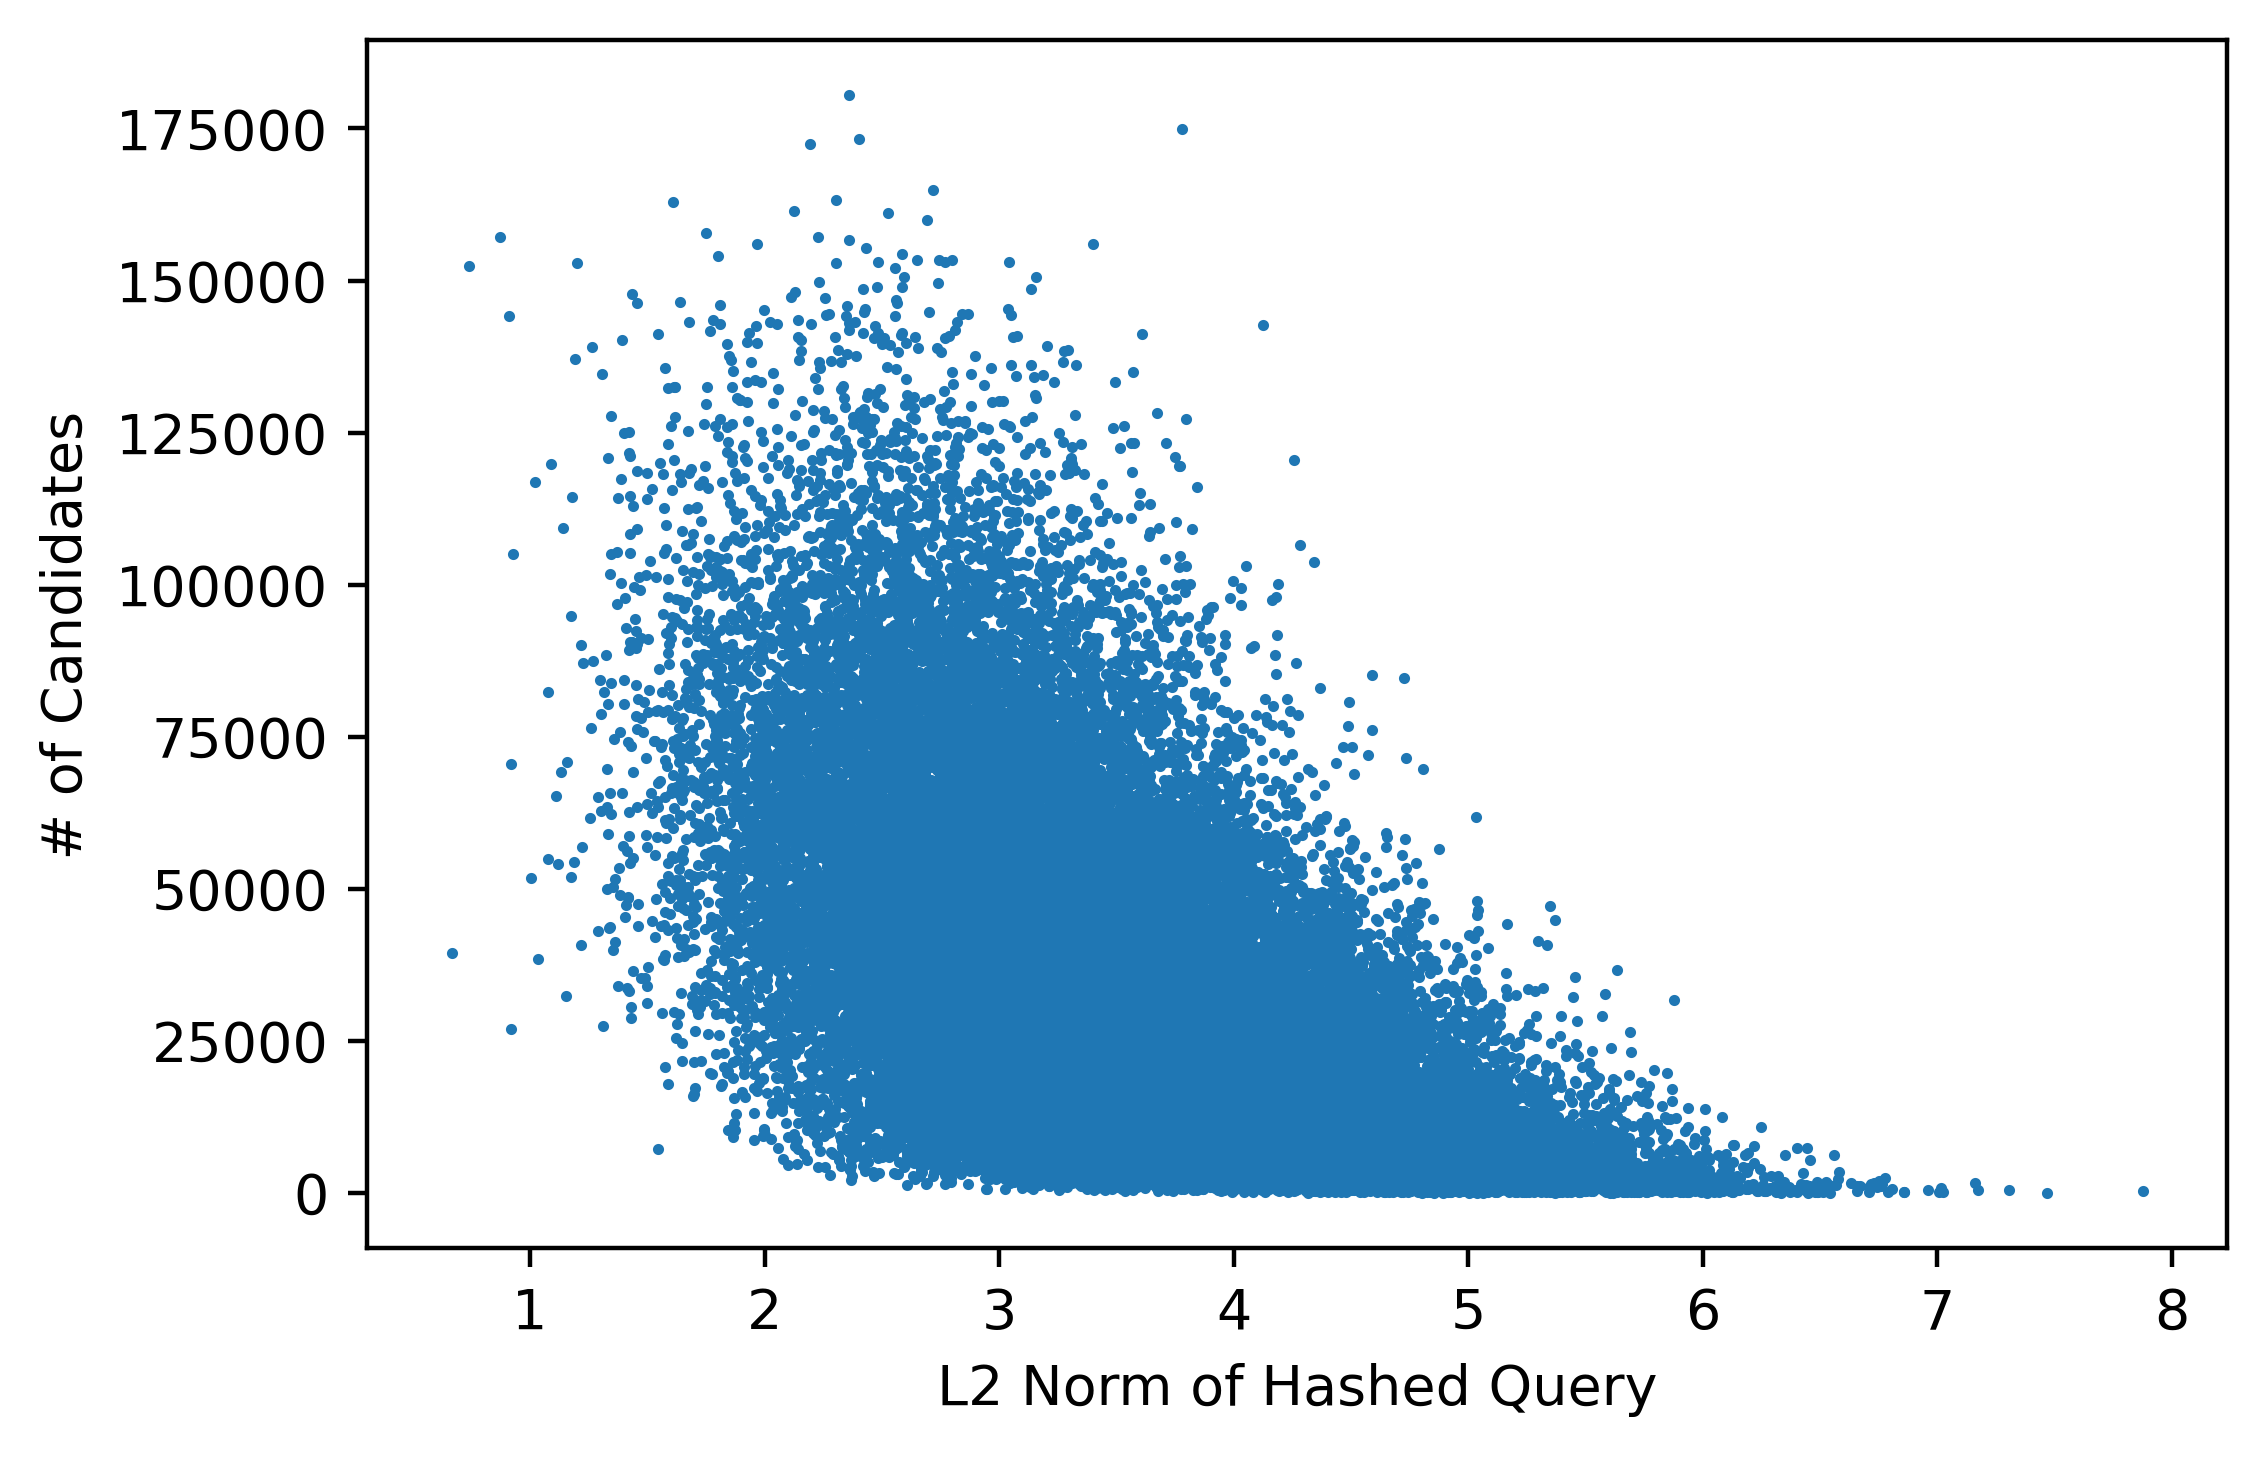

In [140]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
plt.scatter(qh_dist, candidate_t, s=1)
ax = plt.gca()
ax.set_xlabel("L2 Norm of Hashed Query") 
ax.set_ylabel( " # of Candidates")
plt.show()

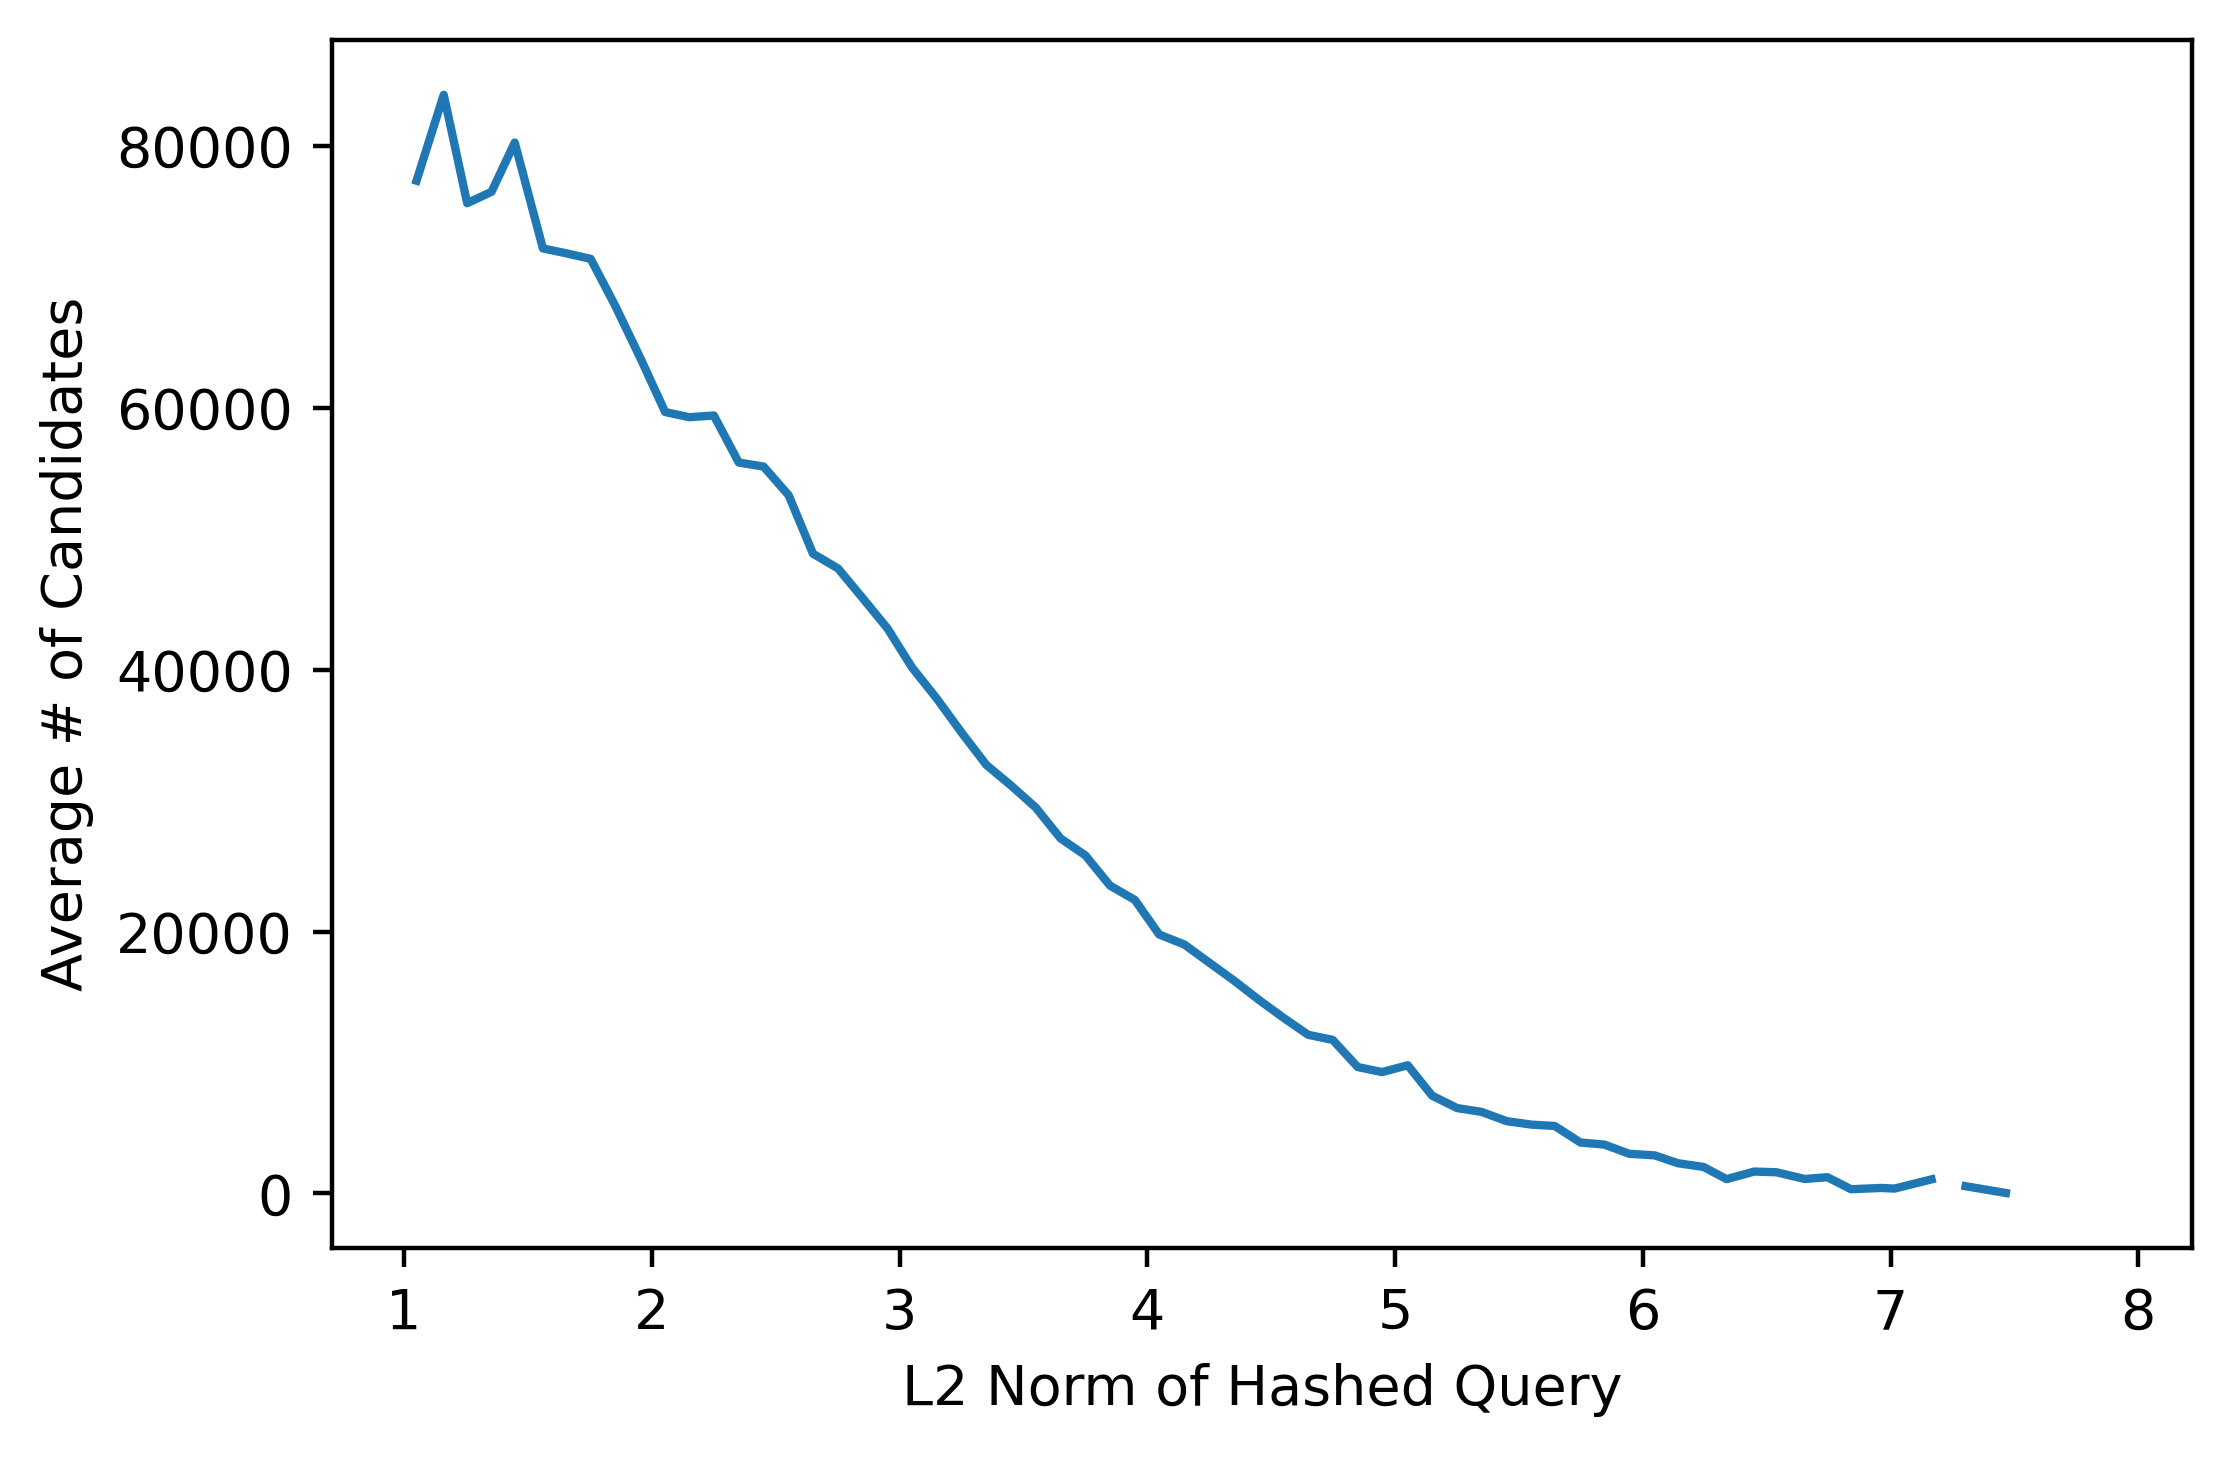

In [143]:
plt.plot(qh_mean[0], qh_mean[1])
ax = plt.gca()
ax.set_xlabel("L2 Norm of Hashed Query") 
ax.set_ylabel( "Average # of Candidates")
plt.show()

In [18]:
import pandas as pd
qid = [i // 50 for i in range(50000)]
table = [i % 50 for i in range(50000)]
data_frame = pd.DataFrame({"query": qid, "table": table, "qh distance": qh_dist})
data_frame

,query,table,qh distance
0,0,0,2.637307
1,0,1,3.729421
2,0,2,2.839913
3,0,3,2.971354
4,0,4,3.631069
...,...,...,...
49995,999,45,3.548455
49996,999,46,4.344825
49997,999,47,1.984474
49998,999,48,5.295967


In [25]:
group_frame = data_frame.groupby([pd.cut(data_frame["qh distance"], bins=np.arange(1.5, 6, 0.1))])
group_frame.all()

,query,table,qh distance
qh distance,,,
"(1.5, 1.6]",True,False,True
"(1.6, 1.7]",True,False,True
"(1.7, 1.8]",False,False,True
"(1.8, 1.9]",True,False,True
"(1.9, 2.0]",True,False,True
"(2.0, 2.1]",True,False,True
"(2.1, 2.2]",True,False,True
"(2.2, 2.3]",True,False,True
"(2.3, 2.4]",False,False,True


In [27]:
distance_group = pd.cut(data_frame["qh distance"], bins=np.arange(1.5, 6, 0.1))
data_frame["qh distance"] = distance_group


In [33]:
data_frame = data_frame.sort_values(by="qh distance")
data_frame = data_frame.dropna()
data_frame
data_frame.to_csv("/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random/qh_group.csv")

In [42]:
near = data_frame[data_frame["qh distance"] == pd.Interval(1.5, 1.6)]
near = set(near["query"])
mid = data_frame[data_frame["qh distance"] == pd.Interval(3.7, 3.8)]
mid = set(mid["query"])
far = data_frame[data_frame["qh distance"] == pd.Interval(5.8, 5.9)]
far = set(far["query"])
near, mid, far

({4,
  8,
  44,
  50,
  57,
  77,
  87,
  93,
  94,
  95,
  111,
  114,
  115,
  120,
  143,
  162,
  178,
  200,
  230,
  244,
  246,
  249,
  269,
  279,
  285,
  299,
  331,
  336,
  337,
  358,
  362,
  381,
  402,
  410,
  431,
  434,
  436,
  449,
  470,
  499,
  507,
  510,
  515,
  521,
  566,
  571,
  575,
  597,
  602,
  613,
  648,
  675,
  685,
  691,
  692,
  726,
  737,
  741,
  757,
  764,
  780,
  820,
  824,
  829,
  854,
  856,
  858,
  883,
  887,
  892,
  913,
  944,
  978},
 {0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  31,
  32,
  33,
  34,
  36,
  37,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  64,
  65,
  66,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,


In [46]:
queries_selected = near & mid & far
# queries selected in this experiment
queries_selected

{4, 246, 279, 410, 510, 566, 597, 602}

In [55]:
def group_distances(query):
    q2d_frame = pd.DataFrame({"data": list(range(1000000)), "distance":distance[query, :]})
    q2d_frame["distance"] = pd.cut(q2d_frame["distance"], bins=np.arange(1.3, 1.5, 0.01))
    q2d_frame = q2d_frame.dropna(how="any")
    return q2d_frame


In [48]:
distance = fvecs_read(config["distance file"])
distance.shape

(1000, 1000000)

In [56]:
selected_q2d = [group_distances(q) for q in queries_selected]

In [80]:
def get_table(query):
    df = data_frame[data_frame["query"] == query]
    df_near =  df[df["qh distance"] == pd.Interval(1.5, 1.6)]["table"].iloc[0]
    df_mid =  df[df["qh distance"] == pd.Interval(3.7, 3.8)]["table"].iloc[0]
    df_far =  df[df["qh distance"] == pd.Interval(5.8, 5.9)]["table"].iloc[0]
    return df_near, df_mid, df_far

In [81]:
selected_tables = [get_table(x) for x in queries_selected]
selected_tables

[(0, 48, 26),
 (35, 0, 44),
 (31, 26, 47),
 (44, 6, 43),
 (34, 9, 31),
 (38, 12, 9),
 (21, 37, 48),
 (10, 7, 24)]

In [158]:
def get_qh(query, table):
    return qh2[query * 50 + table, :]
selected_qh = []
for q, qt in zip(queries_selected, selected_tables):
    for table in qt:
        selected_qh.append(get_qh(q, table))
        print(q, table, np.linalg.norm(get_qh(q, table)))
len(selected_qh)

4 0 1.5779105
4 48 3.7116504
4 26 5.854213
597 35 1.5725272
597 0 3.780475
597 44 5.8482203
566 31 1.5737746
566 26 3.7981977
566 47 5.877109
279 44 1.5758392
279 6 3.7833445
279 43 5.8768725
602 34 1.5640169
602 9 3.7928574
602 31 5.8123975
246 38 1.5477475
246 12 3.7738094
246 9 5.8474946
410 21 1.5051588
410 37 3.7175913
410 48 5.8507886
510 10 1.5333072
510 7 3.7265208
510 24 5.8610477


24

In [82]:
qh.shape

(50000, 9)

In [101]:
%store selected_data

Stored 'selected_data' (list)


In [89]:
%store qh selected_q2d selected_tables selected_qh queries_selected

Stored 'qh' (ndarray)
Stored 'selected_q2d' (list)
Stored 'selected_tables' (list)
Stored 'selected_qh' (list)
Stored 'queries_selected' (set)


In [95]:
near_dist = pd.Interval(1.30, 1.31)
mid_dist = pd.Interval(1.39, 1.40)
far_dist = pd.Interval(1.48, 1.49)

In [100]:
def get_data(query, q2h):
    df = q2h[q2h["distance"] == near_dist]
    near_data = set(df["data"])
    df = q2h[q2h["distance"] == mid_dist]
    mid_data = set(df["data"])
    df = q2h[q2h["distance"] == far_dist]
    far_data = set(df["data"])
    return near_data, mid_data, far_data

selected_data = []
for q, q2h in zip(queries_selected, selected_q2d):
    selected_data.append(get_data(q, q2h))

[len(x) for y in selected_data for x in y ]


[14668,
 59997,
 34483,
 14552,
 59630,
 34584,
 14635,
 59601,
 34135,
 14510,
 59961,
 34135,
 14562,
 59787,
 34555,
 14635,
 59717,
 34185,
 14503,
 59912,
 34415,
 14557,
 59749,
 34361]

In [5]:
data = fvecs_read(config["data filename"])

In [168]:
hash_f = np.array(hfuncs[:-1])
hash_f.shape

(450, 128)

In [108]:
raw_hashes = data @ hash_f.transpose()
raw_hashes.shape

(1000000, 450)

In [109]:
%store raw_hashes

Stored 'raw_hashes' (ndarray)


In [112]:
selected_tables[0], queries_selected[0]

((0, 48, 26), 4)

In [111]:
queries_selected = list(queries_selected)

In [118]:
def get_diff_hist(table, partition, qh):
    data_hashes = raw_hashes[list(partition), table * 9: table * 9 + 9]
    diff = data_hashes - qh
    return np.linalg.norm(diff, axis=1)

diff_4_near = get_diff_hist(selected_tables[0][0], selected_data[0][0], selected_qh[0])
diff_4_near.shape


(14668,)

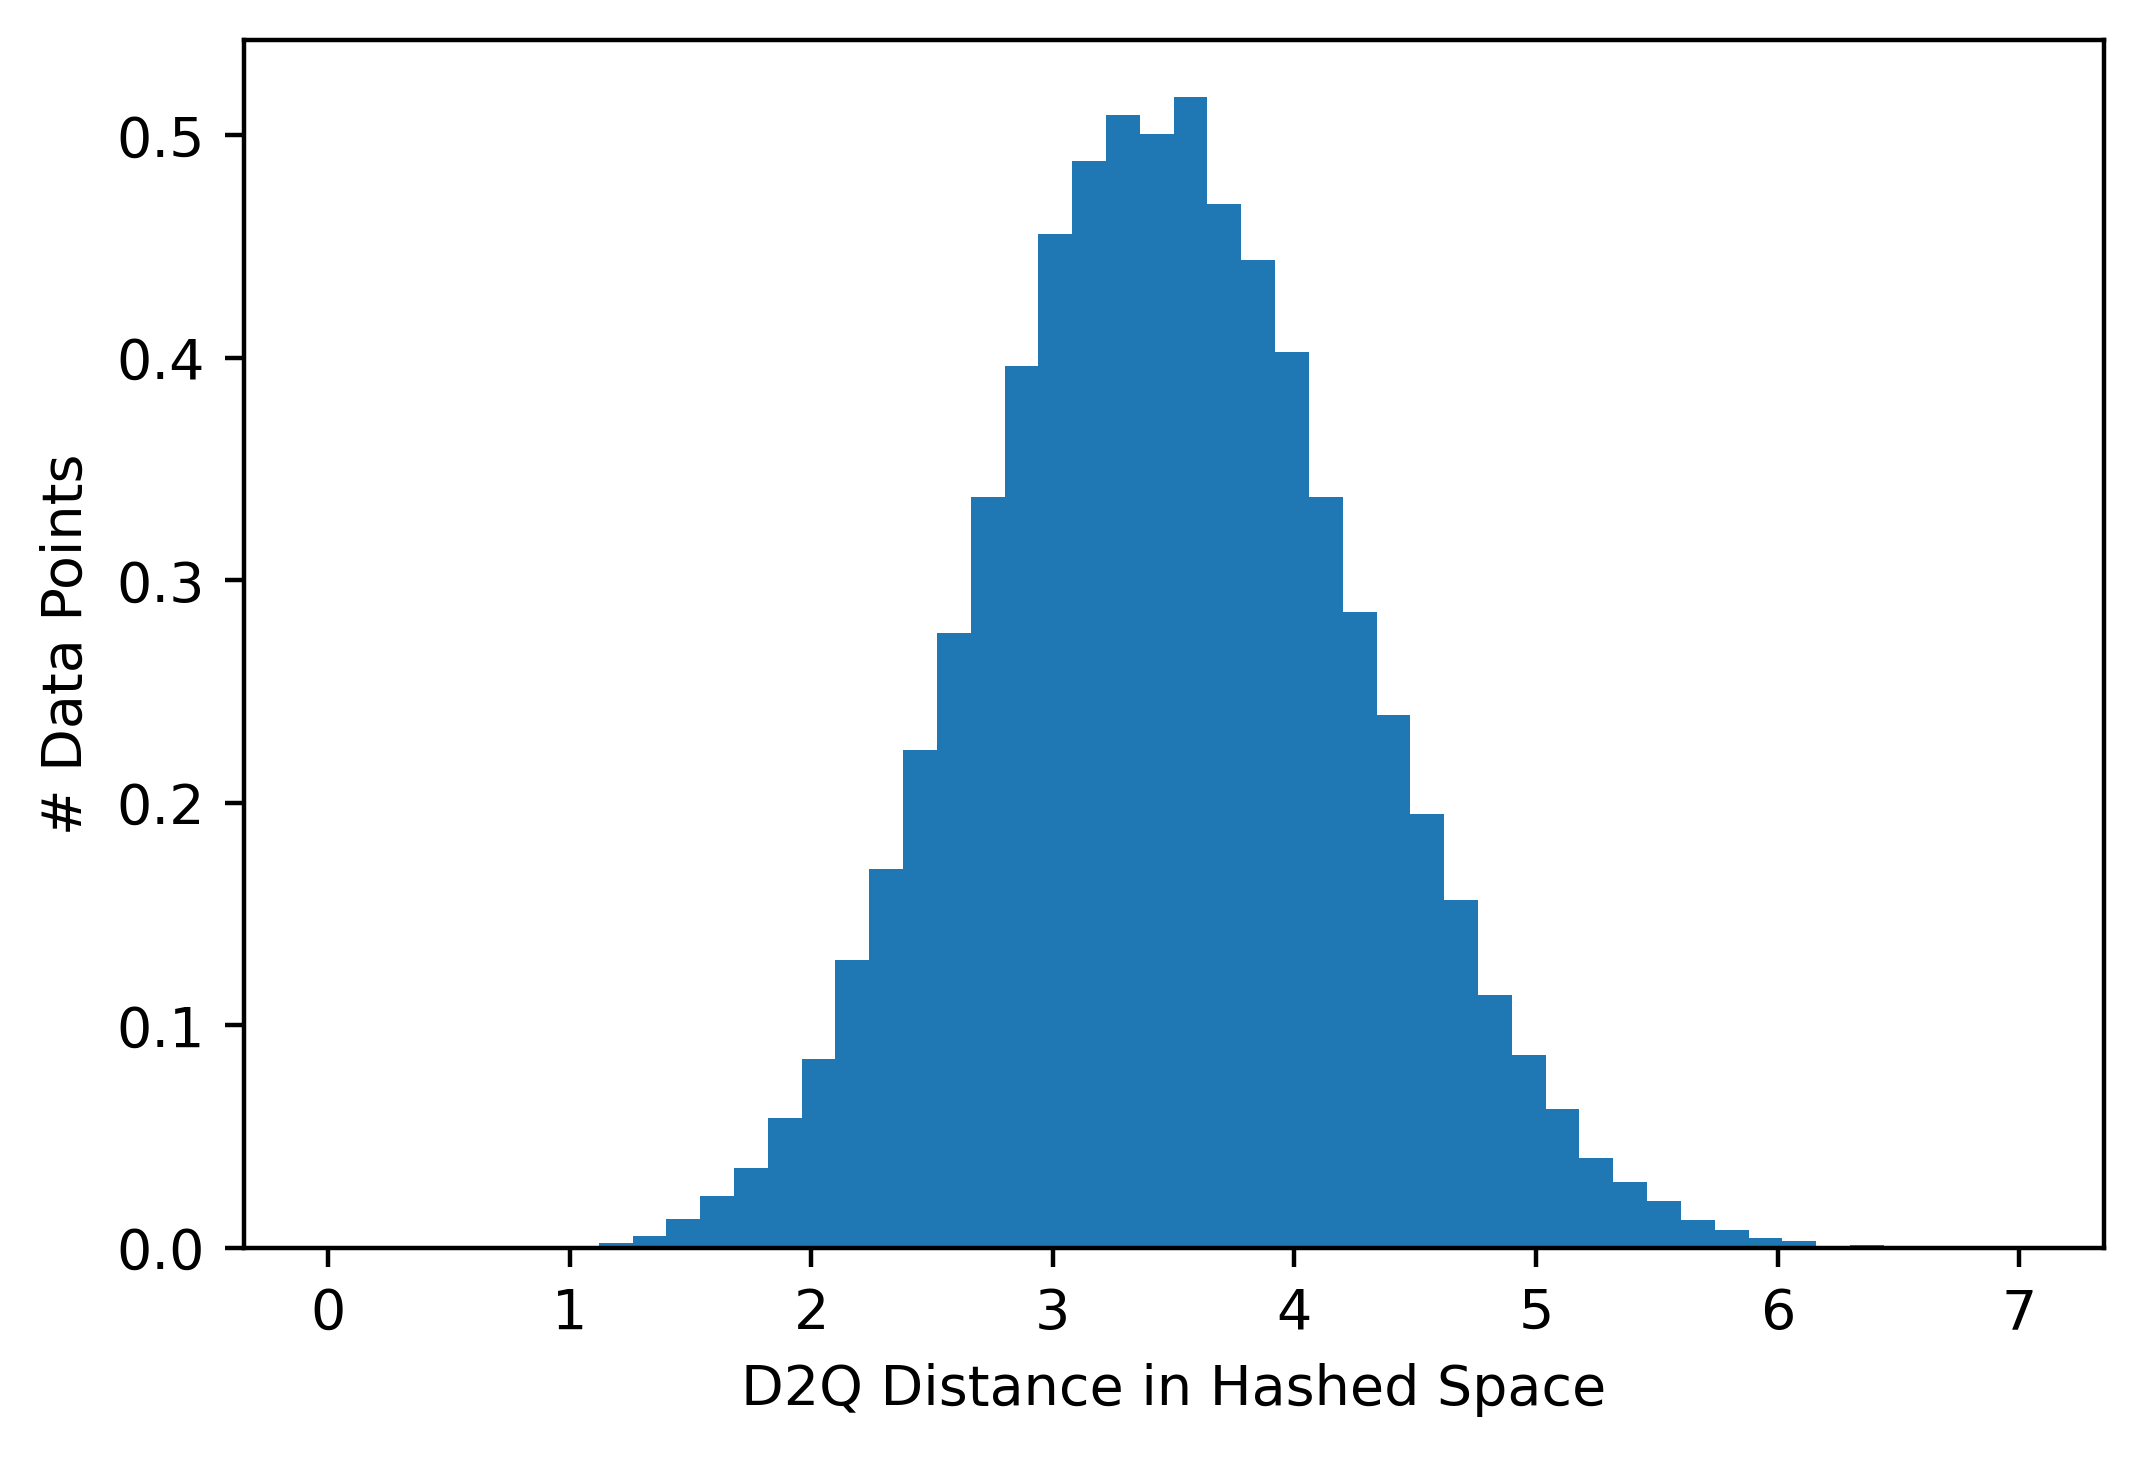

In [126]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
diff_4_near = get_diff_hist(selected_tables[0][0], selected_data[0][1], selected_qh[0])
plt.hist(diff_4_near, bins=50, range=(0, 7), density=True)
ax = plt.gca()
ax.set_xlabel("D2Q Distance in Hashed Space") 
ax.set_ylabel( "# Data Points")

plt.show()

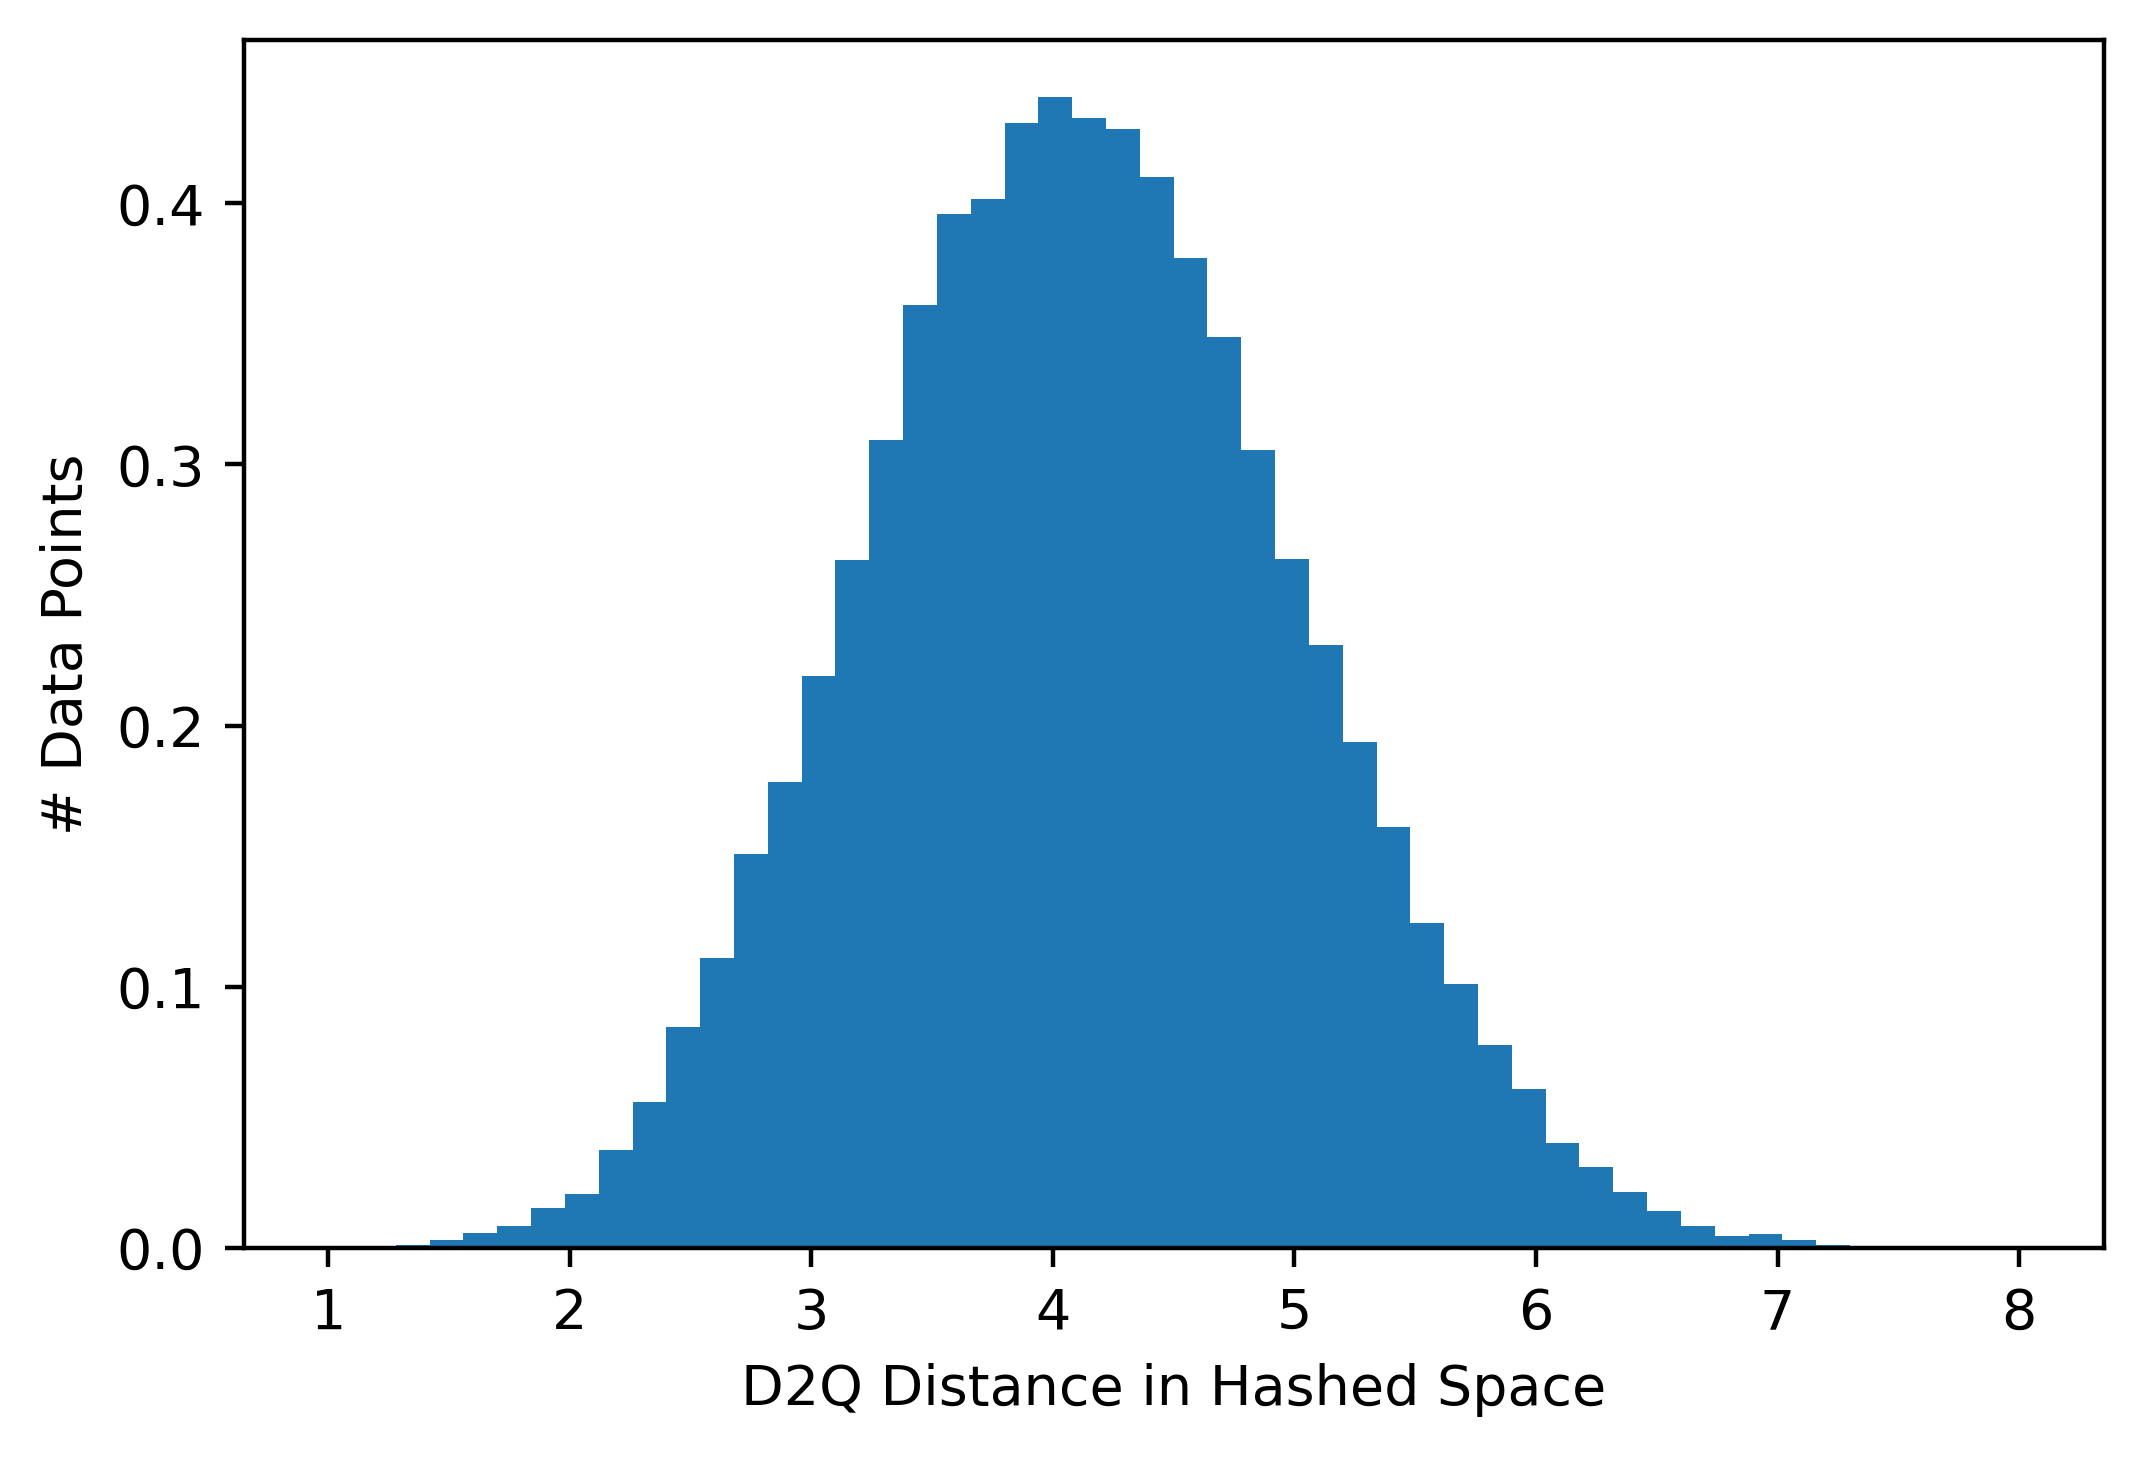

In [127]:
diff_4_far = get_diff_hist(selected_tables[0][2], selected_data[0][1], selected_qh[2])
plt.hist(diff_4_far, bins=50, range=(1, 8), density=True)
ax = plt.gca()
ax.set_xlabel("D2Q Distance in Hashed Space") 
ax.set_ylabel( "# Data Points")

plt.show()

In [164]:
import scipy.stats
dist_list = [1.3, 1.4, 1.5]
def plot_hist(q2d, query):
    chi_dist = scipy.stats.chi(9, 0, dist_list[q2d])
    x = np.arange(0, 8, 0.02)
    diff_4_near = get_diff_hist(selected_tables[query][0], selected_data[query][q2d], selected_qh[query * 3])
    diff_4_far = get_diff_hist(selected_tables[query][2], selected_data[query][q2d], selected_qh[query * 3 + 2])
    diff_4_mid = get_diff_hist(selected_tables[query][1], selected_data[query][q2d], selected_qh[query * 3 + 1])
    print(np.linalg.norm(selected_qh[query * 3]), np.linalg.norm(selected_qh[query * 3 + 1]), 
        np.linalg.norm(selected_qh[query * 3 + 2]))
    plt.hist(diff_4_mid, bins=50, range=(0, 10), density=True, alpha=0.5, color='g', label="mid")
    plt.hist(diff_4_far, bins=50, range=(0, 10), density=True, alpha=0.5, color="b", label="far")
    plt.hist(diff_4_near, bins=50, range=(0, 10), density=True, alpha=0.5, color='m', label="near")
    plt.plot(x, chi_dist.pdf(x), color='r', label="theory")
    ax = plt.gca()
    ax.set_xlabel("D2Q Distance in Hashed Space") 
    ax.set_ylabel( "# Data Points")
    plt.legend(loc="upper right")
    plt.show()

1.5779105 3.7116504 5.854213


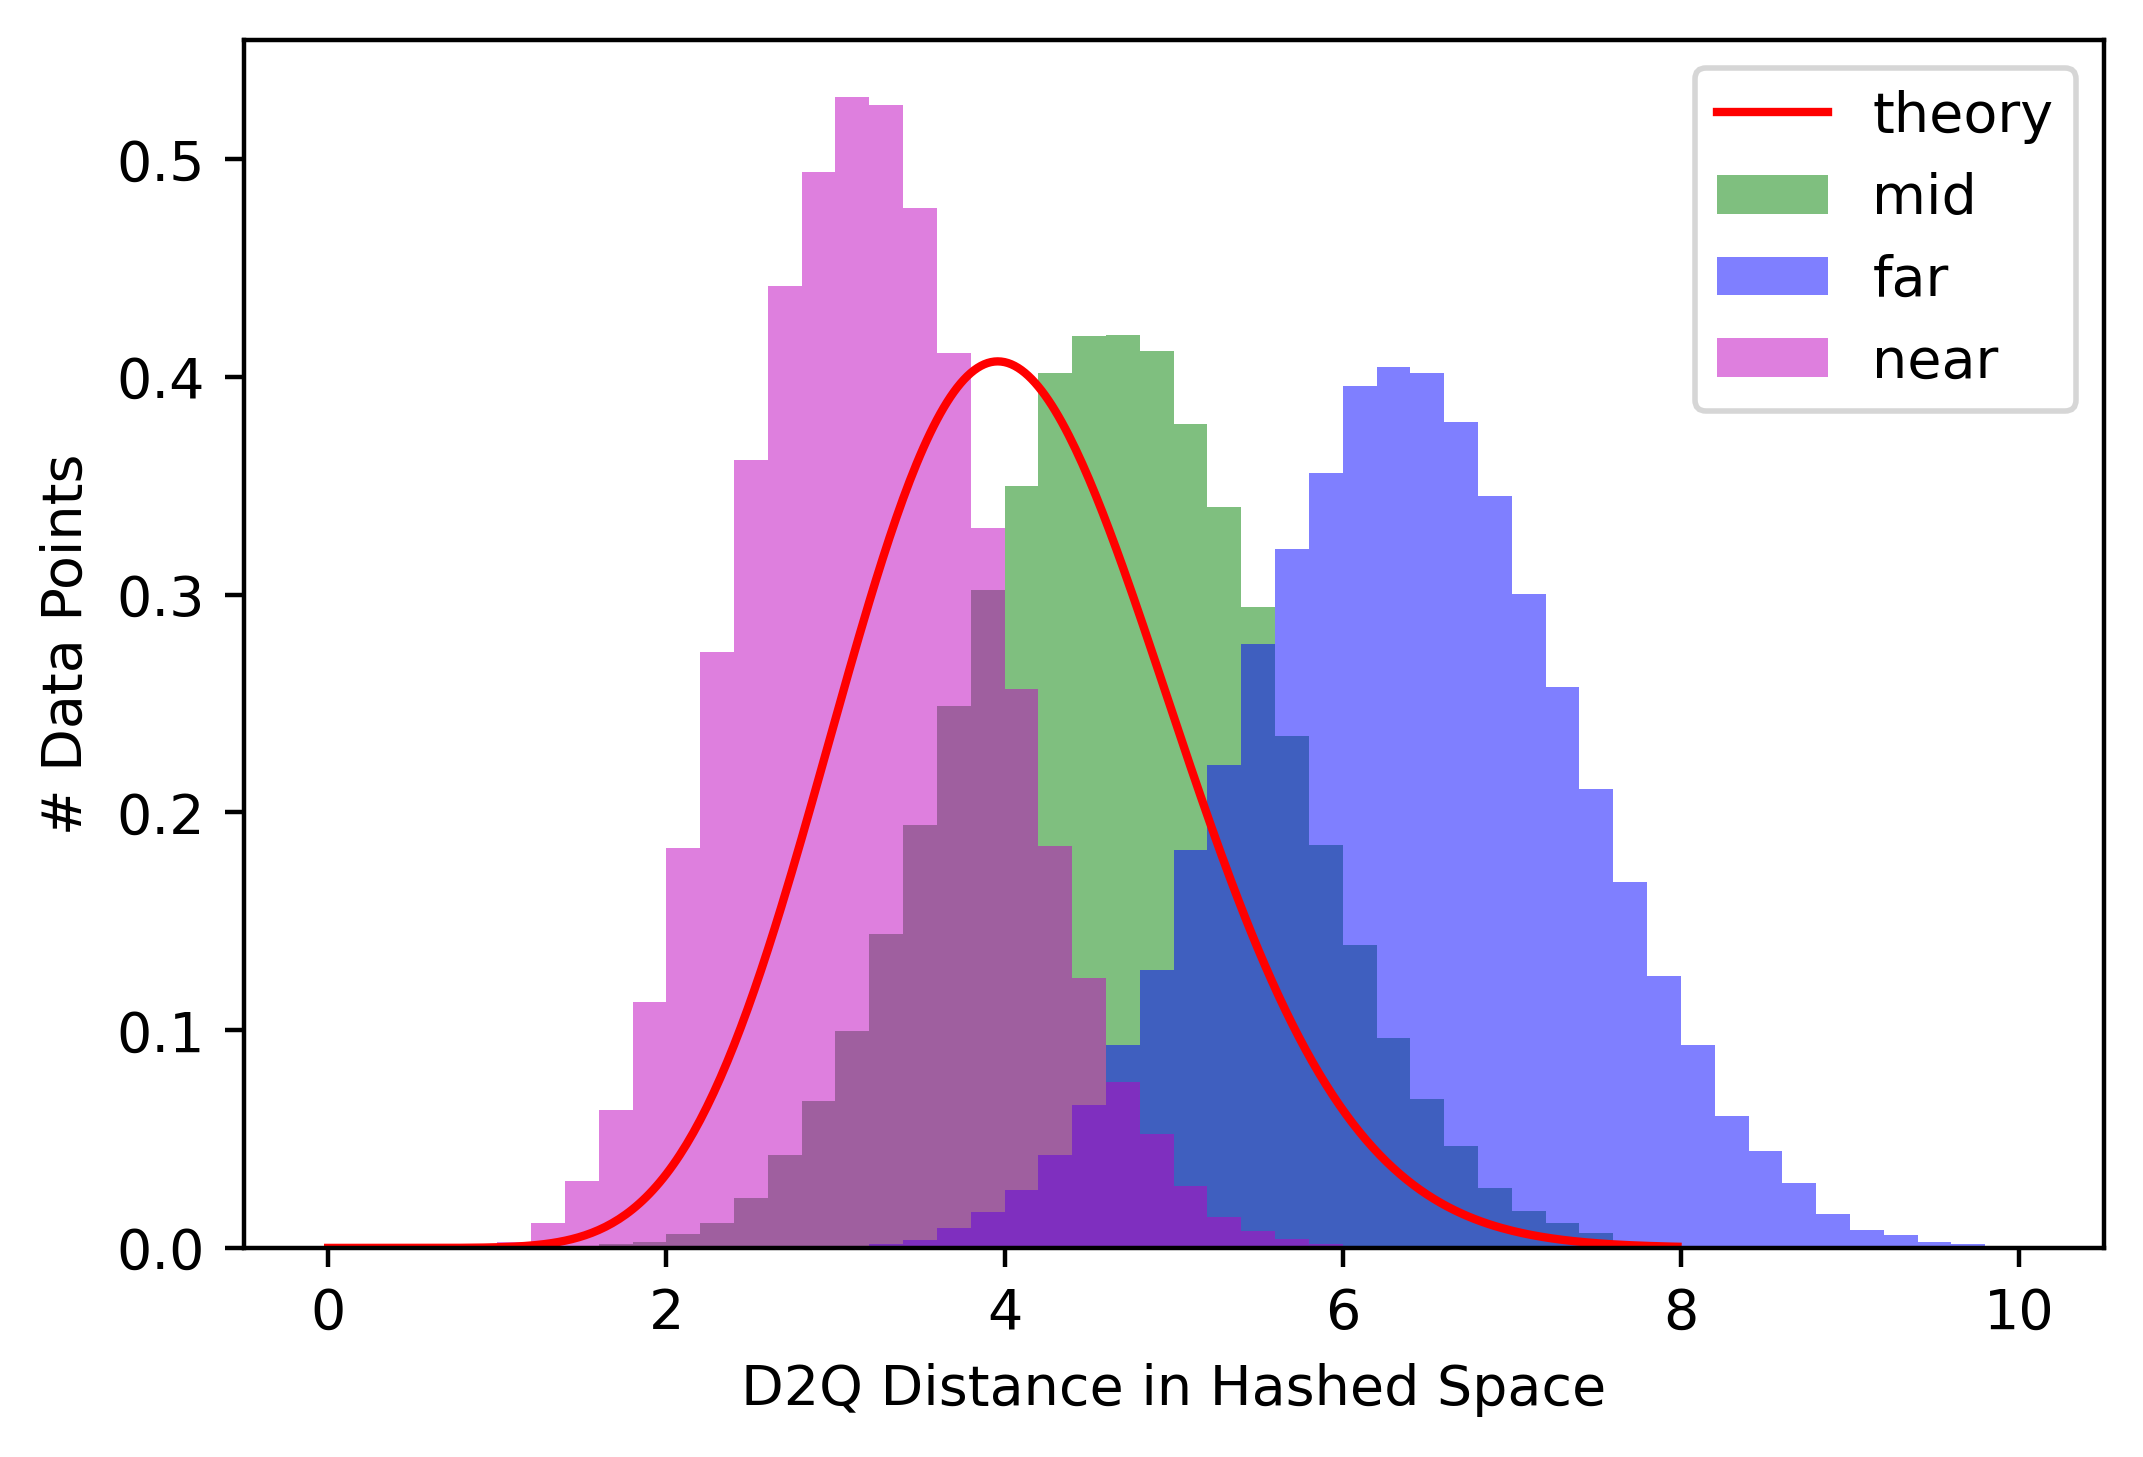

In [165]:
plot_hist(1, 0)

1.5725272 3.780475 5.8482203


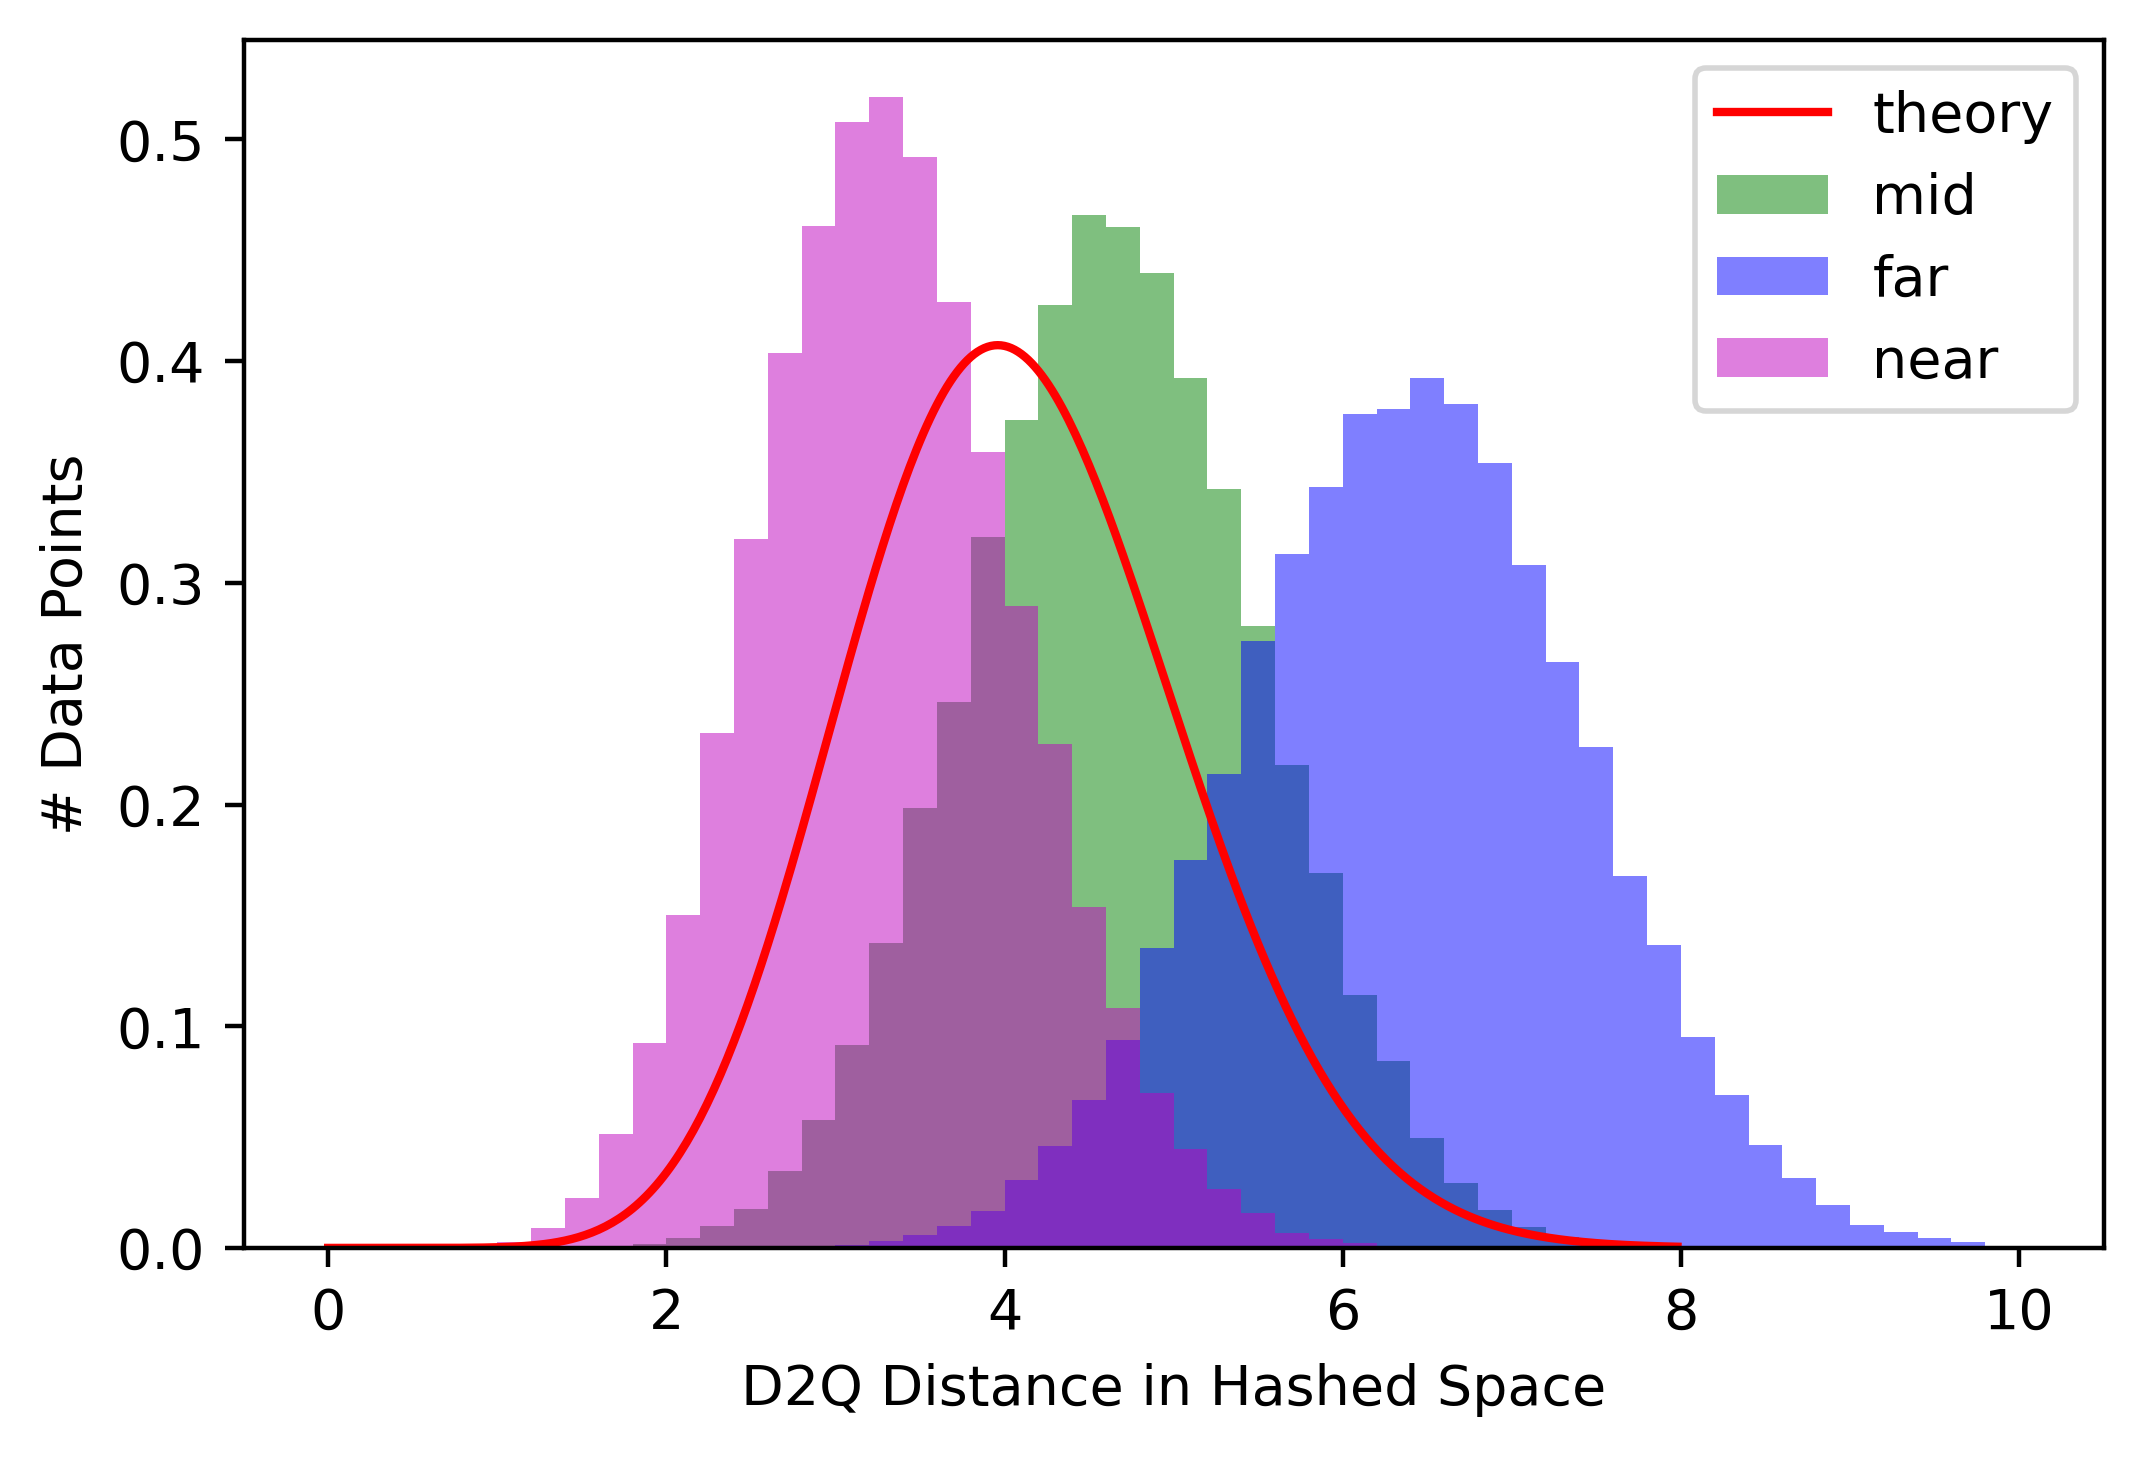

In [166]:
plot_hist(1, 1)

1.5051588 3.7175913 5.8507886


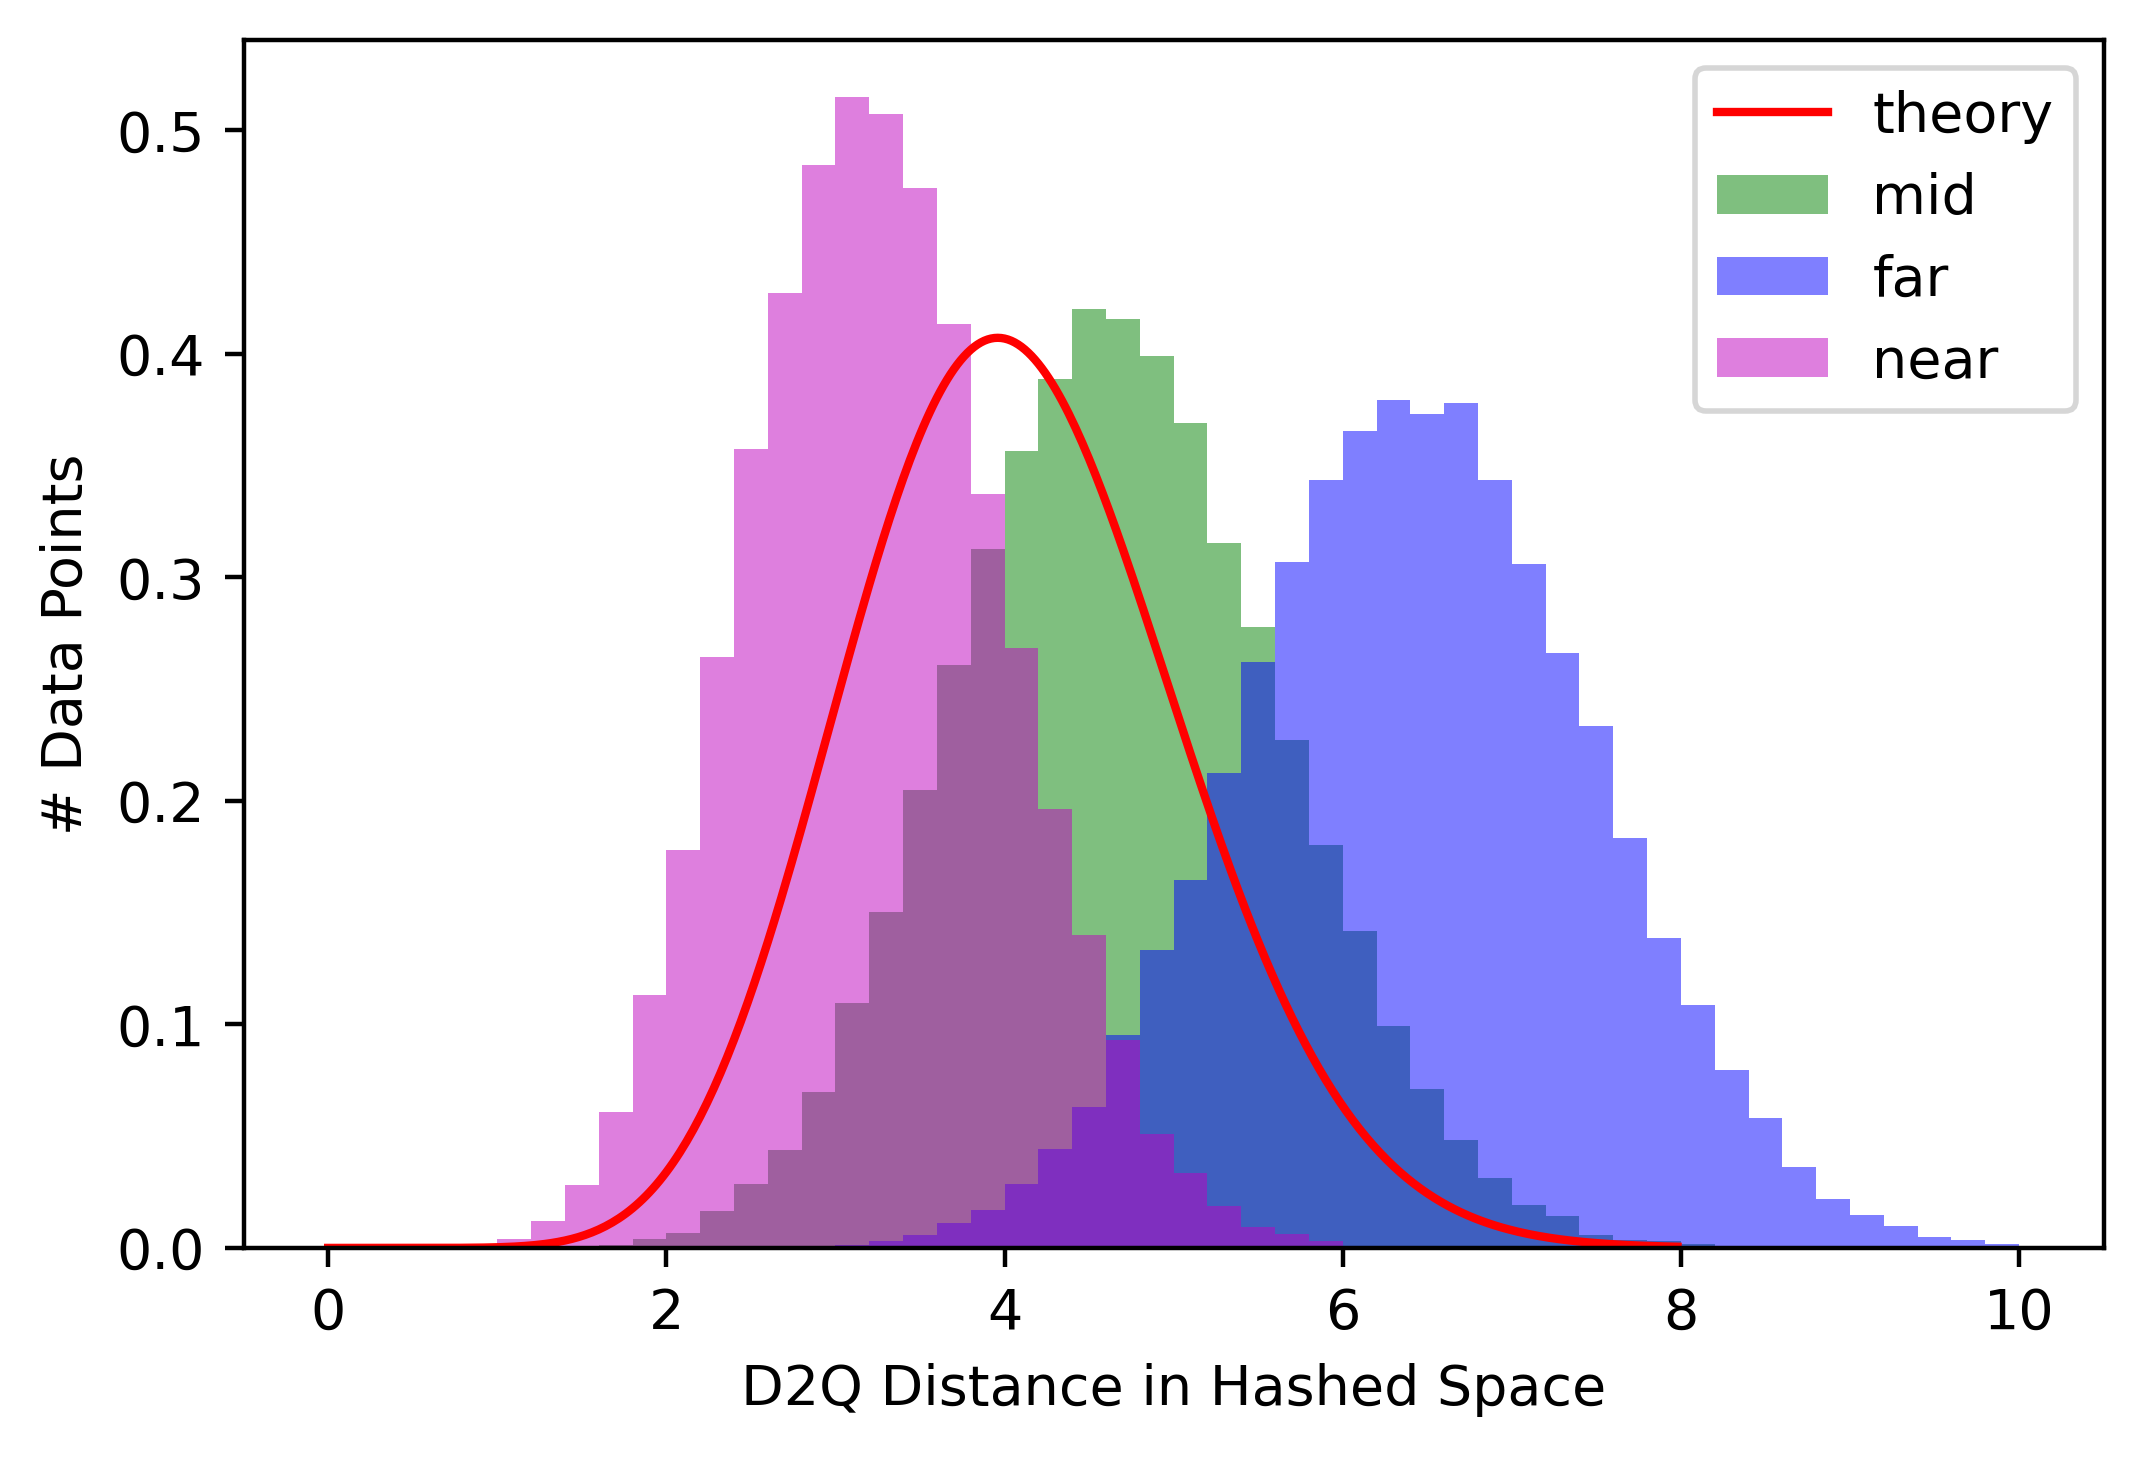

In [167]:
plot_hist(1, 6)

In [149]:
sel_data = selected_data[0][1]
sel_data

{2,
 524291,
 655365,
 786438,
 16,
 524307,
 786452,
 262165,
 786453,
 393240,
 917529,
 262175,
 262183,
 786477,
 393267,
 53,
 917562,
 786491,
 393281,
 393291,
 131148,
 78,
 524368,
 393297,
 131154,
 83,
 786518,
 524376,
 131163,
 524382,
 262241,
 524387,
 101,
 109,
 786542,
 786543,
 524400,
 131187,
 116,
 262259,
 786547,
 262263,
 524408,
 121,
 655482,
 786555,
 131194,
 131195,
 917630,
 524413,
 262270,
 131206,
 262281,
 655497,
 524429,
 262294,
 131223,
 655510,
 154,
 393375,
 524449,
 655523,
 655526,
 393384,
 131242,
 655530,
 917680,
 393395,
 917683,
 393397,
 393399,
 184,
 393402,
 188,
 190,
 131267,
 131268,
 393411,
 786628,
 524487,
 524488,
 917700,
 262351,
 131280,
 262352,
 393426,
 524497,
 524502,
 393437,
 524509,
 655582,
 393441,
 228,
 786660,
 262376,
 917738,
 262380,
 786671,
 786672,
 262385,
 244,
 786680,
 250,
 655611,
 524541,
 262399,
 131328,
 524545,
 264,
 524556,
 131343,
 272,
 917789,
 524577,
 786726,
 131372,
 786742,
 786743

In [150]:
data_hash = raw_hashes[list(sel_data)]
data_hash.shape

(59997, 450)

In [151]:
data_t0 = raw_hashes[:, :9]
data_t0.shape

(1000000, 9)

In [152]:
np.mean(data_t0, axis=0), np.cov(data_t0, rowvar=False)

(array([-0.0006497 , -0.00019613, -0.0004395 , -0.00164573, -0.00078178,
         0.0015965 , -0.00091492,  0.00022364,  0.00104865], dtype=float32),
 array([[ 0.8511959 ,  0.12174152, -0.06410101, -0.00322857,  0.05486722,
          0.05021543, -0.12402268, -0.03509253,  0.04521892],
        [ 0.12174152,  0.81398332, -0.08236781,  0.00238011,  0.08051838,
          0.01407531,  0.00800735, -0.09606885,  0.11020861],
        [-0.06410101, -0.08236781,  0.96735757, -0.02272233, -0.03276314,
          0.00940262,  0.01478622, -0.00275466,  0.04995954],
        [-0.00322857,  0.00238011, -0.02272233,  0.86006831, -0.11150847,
         -0.08823274,  0.06970259,  0.09174447, -0.20919324],
        [ 0.05486722,  0.08051838, -0.03276314, -0.11150847,  0.92051745,
         -0.09615696, -0.08441992, -0.06614342,  0.09268543],
        [ 0.05021543,  0.01407531,  0.00940262, -0.08823274, -0.09615696,
          0.90905063,  0.0996217 , -0.07919157,  0.12322221],
        [-0.12402268,  0.00800735,

In [154]:
data_t10 = raw_hashes[:, 90:99]
np.mean(data_t10, axis=0), np.cov(data_t10, rowvar=False)

(array([-1.5662729e-03, -4.4015134e-04,  8.1101156e-05, -2.2562456e-03,
         1.1150378e-03,  1.2743262e-04,  2.1010982e-03, -3.0128815e-04,
         1.0661848e-03], dtype=float32),
 array([[ 1.15833846,  0.00510608, -0.13717874,  0.06390118,  0.01701046,
         -0.01450217, -0.09875167,  0.08197119,  0.21643072],
        [ 0.00510608,  1.18199572, -0.02658458,  0.08564895, -0.05194314,
         -0.04426559, -0.03096721,  0.03997689,  0.01451575],
        [-0.13717874, -0.02658458,  1.09193472, -0.07812665, -0.0107796 ,
          0.02512932, -0.01887723, -0.13869353, -0.05287412],
        [ 0.06390118,  0.08564895, -0.07812665,  1.00252605, -0.06920889,
         -0.01645794, -0.10627992, -0.06305522,  0.09820094],
        [ 0.01701046, -0.05194314, -0.0107796 , -0.06920889,  1.00386345,
         -0.02202378, -0.0889885 ,  0.05127483,  0.04898785],
        [-0.01450217, -0.04426559,  0.02512932, -0.01645794, -0.02202378,
          0.99484462,  0.16171899,  0.05952841,  0.13912042],

In [155]:
np.cov(data[:,0:10], rowvar=False)

array([[ 7.82206575e-03, -6.14099012e-06,  3.43199811e-06,
        -3.32632672e-06, -6.29845962e-06,  1.76836196e-05,
        -1.37994644e-06, -4.58030628e-06,  1.97566725e-05,
        -3.31303861e-06],
       [-6.14099012e-06,  7.80684544e-03, -5.80924393e-06,
         6.88619151e-06, -1.67622903e-06,  2.35610281e-06,
        -3.04276451e-06, -1.77362507e-06,  7.43963285e-06,
        -4.27704128e-06],
       [ 3.43199811e-06, -5.80924393e-06,  7.79314058e-03,
         3.31862553e-06, -1.02105915e-05, -3.50671444e-06,
         4.62300937e-06, -1.40595824e-05,  4.59922890e-06,
         1.00824113e-05],
       [-3.32632672e-06,  6.88619151e-06,  3.31862553e-06,
         7.81970295e-03, -1.92090418e-05, -9.65798335e-06,
        -2.54661284e-07,  1.18113377e-05,  3.66489148e-06,
        -1.25155408e-05],
       [-6.29845962e-06, -1.67622903e-06, -1.02105915e-05,
        -1.92090418e-05,  7.81622127e-03,  3.46111686e-06,
         5.81742464e-06,  9.46777802e-06, -6.26878788e-06,
         1.

In [156]:
qh2.shape

(50000, 9)

In [157]:
np.linalg.norm(qh2[:50, :], axis=1)

array([2.6373067, 3.7294207, 2.8399127, 2.9713545, 3.6310694, 4.614086 ,
       3.6827724, 2.928643 , 3.6150212, 2.433181 , 4.0531015, 2.8004606,
       3.6003907, 3.1959014, 2.7937124, 2.7646585, 3.8881752, 2.3145957,
       2.4190824, 4.1600194, 3.3321798, 3.8800495, 3.5214796, 3.4586794,
       2.3562653, 4.3716407, 4.315299 , 3.1614358, 3.5137315, 5.2490416,
       3.2867436, 3.3337915, 4.9638276, 4.031264 , 3.4046571, 1.7548729,
       3.4250016, 4.9894443, 3.1314754, 3.9445179, 2.818932 , 3.35141  ,
       4.4435105, 4.23997  , 5.2634454, 2.7253625, 2.4259706, 3.4689798,
       5.2982683, 2.513682 ], dtype=float32)

In [181]:
np.mean(data_hash[:,:9], axis=0), np.cov(data_hash[:,:9], rowvar=False)

(array([ 0.01602934,  0.00496373,  0.0101282 , -0.00222233, -0.02428089,
         0.01236511, -0.00274008,  0.02906862, -0.00803601], dtype=float32),
 array([[ 0.85461282,  0.12235865, -0.06963459, -0.00706625,  0.06462114,
          0.04489964, -0.12903014, -0.03912108,  0.04456656],
        [ 0.12235865,  0.81539839, -0.08639187, -0.00139097,  0.08106503,
          0.01511781,  0.00997223, -0.09730091,  0.10766231],
        [-0.06963459, -0.08639187,  0.97709103, -0.02362731, -0.03476804,
          0.01361121,  0.02085411, -0.00866662,  0.05035304],
        [-0.00706625, -0.00139097, -0.02362731,  0.86946025, -0.11330984,
         -0.09077961,  0.06762173,  0.09164023, -0.22151762],
        [ 0.06462114,  0.08106503, -0.03476804, -0.11330984,  0.92935052,
         -0.09778327, -0.09300151, -0.06203785,  0.08339343],
        [ 0.04489964,  0.01511781,  0.01361121, -0.09077961, -0.09778327,
          0.91920301,  0.10158323, -0.0789168 ,  0.13223818],
        [-0.12903014,  0.00997223,

In [159]:
qh2[0, :]

array([-0.41210288, -0.14025843,  1.170784  ,  1.3756181 , -0.4454307 ,
        1.0326755 ,  0.78501654, -0.389122  , -1.212572  ], dtype=float32)

In [183]:
cov_mat = np.cov(raw_hashes[sel_data], rowvar=False)
np.linalg.eig(cov_mat)[0]

array([8.00053208e+00+0.00000000e+00j, 7.80390625e+00+0.00000000e+00j,
       7.55295035e+00+0.00000000e+00j, 7.31655480e+00+0.00000000e+00j,
       7.23996367e+00+0.00000000e+00j, 7.17379487e+00+0.00000000e+00j,
       6.96093321e+00+0.00000000e+00j, 6.71857134e+00+0.00000000e+00j,
       6.58556798e+00+0.00000000e+00j, 6.51145601e+00+0.00000000e+00j,
       6.38026303e+00+0.00000000e+00j, 6.37063376e+00+0.00000000e+00j,
       6.32063687e+00+0.00000000e+00j, 6.24577850e+00+0.00000000e+00j,
       6.14148188e+00+0.00000000e+00j, 6.05877591e+00+0.00000000e+00j,
       6.01947222e+00+0.00000000e+00j, 5.98269726e+00+0.00000000e+00j,
       5.85252234e+00+0.00000000e+00j, 5.75945689e+00+0.00000000e+00j,
       5.70518974e+00+0.00000000e+00j, 5.59417260e+00+0.00000000e+00j,
       5.52274480e+00+0.00000000e+00j, 5.40506586e+00+0.00000000e+00j,
       5.31983187e+00+0.00000000e+00j, 5.26839227e+00+0.00000000e+00j,
       5.18975164e+00+0.00000000e+00j, 5.17707446e+00+0.00000000e+00j,
      

In [165]:
sel_data = list(selected_data[0][0])
np.mean(raw_hashes[sel_data,:9], axis=0), np.cov(raw_hashes[sel_data,:9], rowvar=False)

(array([ 0.07885873, -0.00037612,  0.03708002, -0.00210653, -0.13099758,
         0.06582404,  0.00161626,  0.15408018, -0.09973805], dtype=float32),
 array([[ 8.31017616e-01,  1.09666951e-01, -7.44090330e-02,
          1.08504933e-03,  6.45015676e-02,  5.23299501e-02,
         -1.18182744e-01, -4.28575486e-02,  4.92480160e-02],
        [ 1.09666951e-01,  7.94664720e-01, -8.44845092e-02,
         -7.17200628e-03,  9.08238618e-02,  2.04390202e-02,
          7.28520598e-03, -1.08139796e-01,  1.11109067e-01],
        [-7.44090330e-02, -8.44845092e-02,  9.81615286e-01,
         -2.20046443e-02, -3.72366928e-02, -1.56682151e-03,
          1.62764498e-02,  4.75609445e-03,  6.50807771e-02],
        [ 1.08504933e-03, -7.17200628e-03, -2.20046443e-02,
          8.58184431e-01, -1.08940400e-01, -8.42159704e-02,
          7.56857306e-02,  8.58890774e-02, -2.10078836e-01],
        [ 6.45015676e-02,  9.08238618e-02, -3.72366928e-02,
         -1.08940400e-01,  9.14121986e-01, -9.81660540e-02,
      

In [172]:
hcov = np.cov(hash_f)
hcov[0]

array([ 8.50962001e-01,  1.18055296e-01, -5.05123918e-02, -1.02847127e-02,
        5.99826359e-02,  4.31663618e-02, -1.32344581e-01, -5.07556991e-02,
        2.72282881e-02,  3.76657780e-02, -1.82214135e-01,  3.45622948e-02,
       -5.99945179e-02,  8.39175108e-02, -6.84481447e-02,  2.61288285e-03,
       -1.43495714e-02,  6.54164511e-02,  8.08317518e-02, -3.23538216e-02,
        6.41545311e-02,  4.73727328e-02, -9.55750098e-02,  1.21773285e-02,
       -3.43934553e-02,  2.25538400e-02,  7.54848632e-02, -9.87039072e-02,
       -1.20755078e-01, -2.11384358e-02,  5.60977520e-02, -4.32382479e-02,
        1.08609728e-01, -1.87573084e-01,  8.51250181e-02,  1.02800728e-01,
       -5.96807277e-02,  2.99676454e-03,  1.76811724e-02,  7.33075675e-03,
       -1.01433094e-01, -7.52824722e-02, -5.41726568e-02, -2.29852945e-01,
       -3.50526495e-02, -4.26020805e-02,  6.73619639e-02,  1.18766484e-01,
       -3.68485405e-02,  4.36298645e-02,  1.07214021e-01,  8.52066634e-02,
        1.52102620e-02,  

In [184]:
sel_data = list(selected_data[0][0])
np.mean(raw_hashes[sel_data,44*9:45*9], axis=0), np.cov(raw_hashes[sel_data,44*9:45*9], rowvar=False)

(array([-0.06010573, -0.05350257, -0.10393129,  0.00242693,  0.1851218 ,
         0.22994536, -0.00540625, -0.03579381,  0.22649929], dtype=float32),
 array([[ 0.99978534,  0.04243251,  0.07527626, -0.00418515,  0.16455556,
         -0.051043  , -0.02427475, -0.07725722, -0.1086737 ],
        [ 0.04243251,  1.20647647,  0.00283712,  0.02899196,  0.01199791,
          0.02256136,  0.05628667,  0.26739928, -0.05721941],
        [ 0.07527626,  0.00283712,  0.9140985 , -0.03346559,  0.06784157,
         -0.05880121, -0.116699  , -0.03194414,  0.02381651],
        [-0.00418515,  0.02899196, -0.03346559,  1.04943555,  0.01454317,
          0.12153632,  0.04824083, -0.19355145, -0.22119024],
        [ 0.16455556,  0.01199791,  0.06784157,  0.01454317,  0.76774276,
          0.00610663,  0.04503562,  0.12136676, -0.02121553],
        [-0.051043  ,  0.02256136, -0.05880121,  0.12153632,  0.00610663,
          1.0449451 , -0.00863416,  0.06098723, -0.0593065 ],
        [-0.02427475,  0.05628667,

In [185]:
qh2[44]

array([ 0.6484221 , -3.1532884 , -1.3856862 ,  0.90838206, -2.3963962 ,
        1.7758689 , -0.16569889, -1.6399015 ,  1.7267698 ], dtype=float32)

In [186]:
sift = fvecs_read("/media/mydrive/KroneckerRotation/data/sift-trainN.fvecs")

In [187]:
sift.shape, np.mean(sift, axis=0)

((10000000, 128),
 array([0.05062164, 0.04108304, 0.03706643, 0.03856693, 0.04720633,
        0.02855224, 0.02368272, 0.02972663, 0.11820912, 0.06462381,
        0.03890136, 0.03549102, 0.04342775, 0.03005843, 0.0305512 ,
        0.05621216, 0.1208    , 0.05268772, 0.02973397, 0.03003197,
        0.04359882, 0.03627402, 0.04207485, 0.07223632, 0.05312554,
        0.03008909, 0.02410273, 0.02904187, 0.0484785 , 0.04039145,
        0.04048918, 0.0449978 , 0.06881171, 0.04308613, 0.03972337,
        0.04776186, 0.06226495, 0.03976556, 0.02844822, 0.03547025,
        0.17781882, 0.06991556, 0.04256412, 0.0495884 , 0.06057897,
        0.03929051, 0.03282737, 0.07567651, 0.18016987, 0.07115404,
        0.0309014 , 0.03871766, 0.06245986, 0.05209308, 0.04574488,
        0.07910442, 0.07023223, 0.03540684, 0.02880577, 0.04177226,
        0.06723545, 0.05245391, 0.04352854, 0.0469823 , 0.06897605,
        0.03522422, 0.02841487, 0.03988505, 0.06222551, 0.04760248,
        0.03977586, 0.04343331

In [189]:
sift = sift - np.mean(sift, axis=0)

In [191]:
norms = np.linalg.norm(sift, axis=1)

(array([7.00000e+00, 2.30000e+01, 5.40000e+01, 2.08000e+02, 5.65000e+02,
        1.20100e+03, 1.92000e+03, 2.41100e+03, 3.03600e+03, 3.70000e+03,
        5.28800e+03, 8.55800e+03, 1.51040e+04, 2.73070e+04, 5.04440e+04,
        8.90320e+04, 1.50150e+05, 2.38543e+05, 3.51072e+05, 4.79236e+05,
        6.02730e+05, 7.10242e+05, 7.89232e+05, 8.36186e+05, 8.55855e+05,
        8.46961e+05, 8.10876e+05, 7.38870e+05, 6.44642e+05, 5.31174e+05,
        4.09802e+05, 2.95755e+05, 1.97549e+05, 1.23744e+05, 7.45880e+04,
        4.29970e+04, 2.47080e+04, 1.42290e+04, 8.55700e+03, 5.23500e+03,
        3.36900e+03, 2.05200e+03, 1.25900e+03, 7.21000e+02, 4.06000e+02,
        2.15000e+02, 1.20000e+02, 4.60000e+01, 1.30000e+01, 8.00000e+00]),
 array([0.4340508 , 0.4461445 , 0.45823818, 0.47033188, 0.48242557,
        0.49451926, 0.50661296, 0.5187066 , 0.53080034, 0.542894  ,
        0.5549877 , 0.5670814 , 0.5791751 , 0.5912688 , 0.6033625 ,
        0.61545616, 0.6275499 , 0.63964355, 0.6517373 , 0.663830

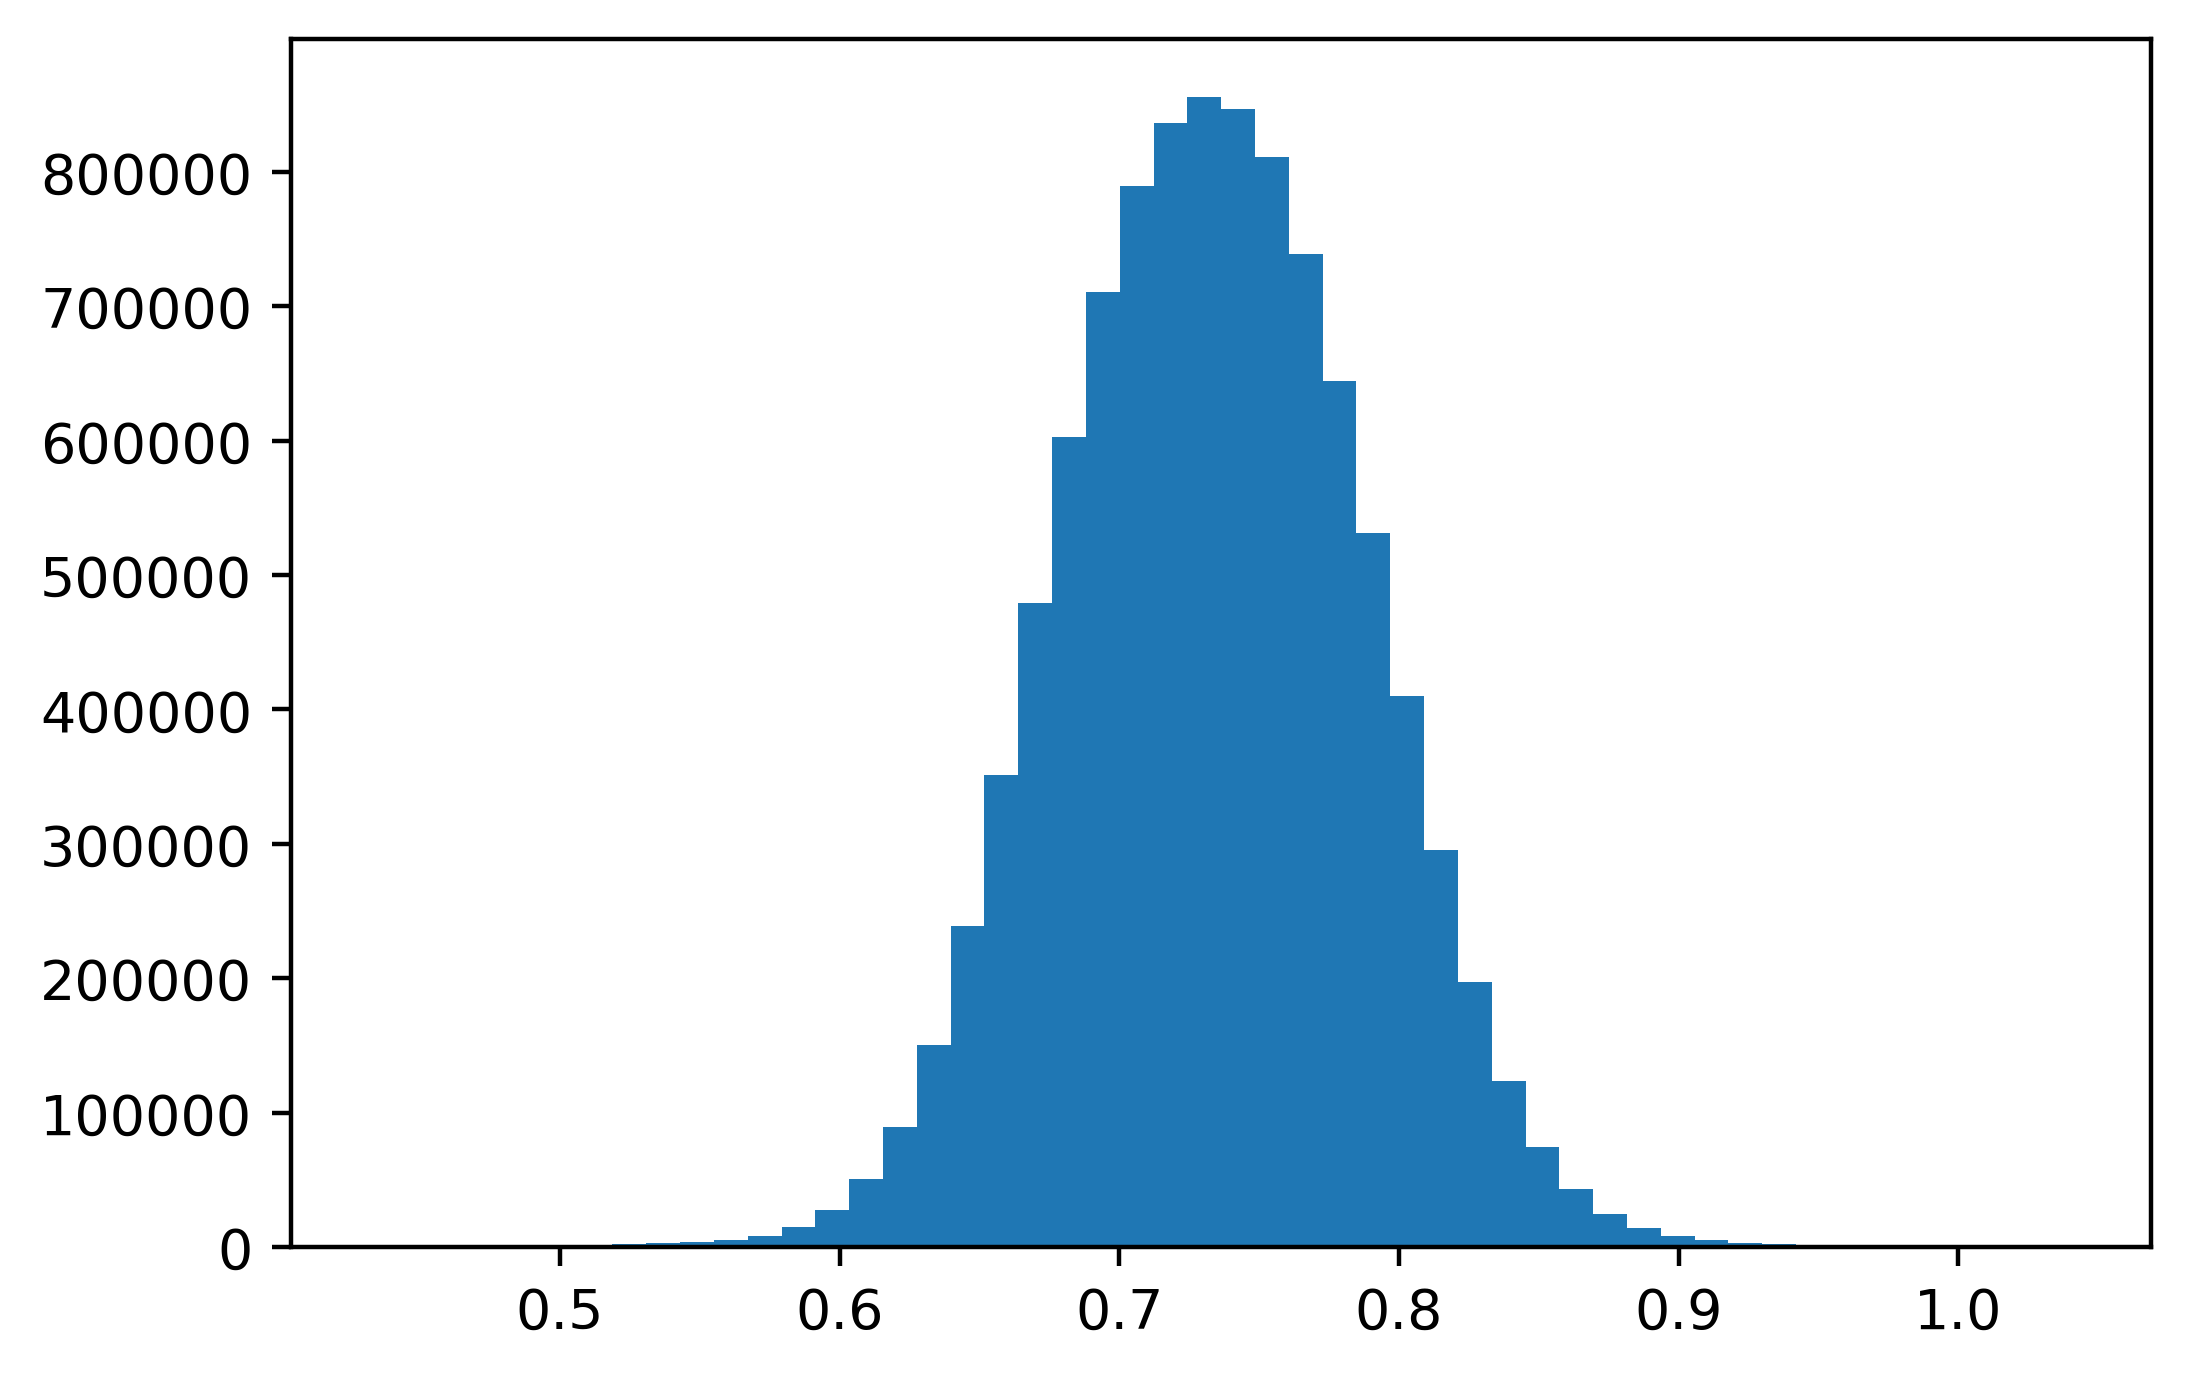

In [193]:
plt.hist(norms, bins=50)

In [198]:
sift_hash = rng.normal(size=(128, 10))

In [199]:
sift_hashed = sift @ sift_hash

In [200]:
hashed_norms = np.linalg.norm(sift_hashed, axis=1)

(array([1.50000e+01, 1.50000e+02, 6.98000e+02, 2.50600e+03, 7.34500e+03,
        1.84040e+04, 3.94400e+04, 7.57150e+04, 1.30917e+05, 2.08159e+05,
        3.02909e+05, 4.10347e+05, 5.22252e+05, 6.26929e+05, 7.12978e+05,
        7.75702e+05, 8.05678e+05, 8.01613e+05, 7.68443e+05, 7.13765e+05,
        6.36752e+05, 5.51938e+05, 4.63072e+05, 3.76343e+05, 2.94246e+05,
        2.25609e+05, 1.67583e+05, 1.21696e+05, 8.58570e+04, 5.89280e+04,
        3.86530e+04, 2.41680e+04, 1.41460e+04, 7.81000e+03, 4.38400e+03,
        2.29600e+03, 1.20000e+03, 6.48000e+02, 3.34000e+02, 1.91000e+02,
        9.10000e+01, 4.50000e+01, 1.70000e+01, 1.30000e+01, 7.00000e+00,
        2.00000e+00, 3.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([0.33698126, 0.44732034, 0.55765941, 0.66799848, 0.77833755,
        0.88867662, 0.99901569, 1.10935476, 1.21969383, 1.33003291,
        1.44037198, 1.55071105, 1.66105012, 1.77138919, 1.88172826,
        1.99206733, 2.1024064 , 2.21274548, 2.32308455, 2.433423

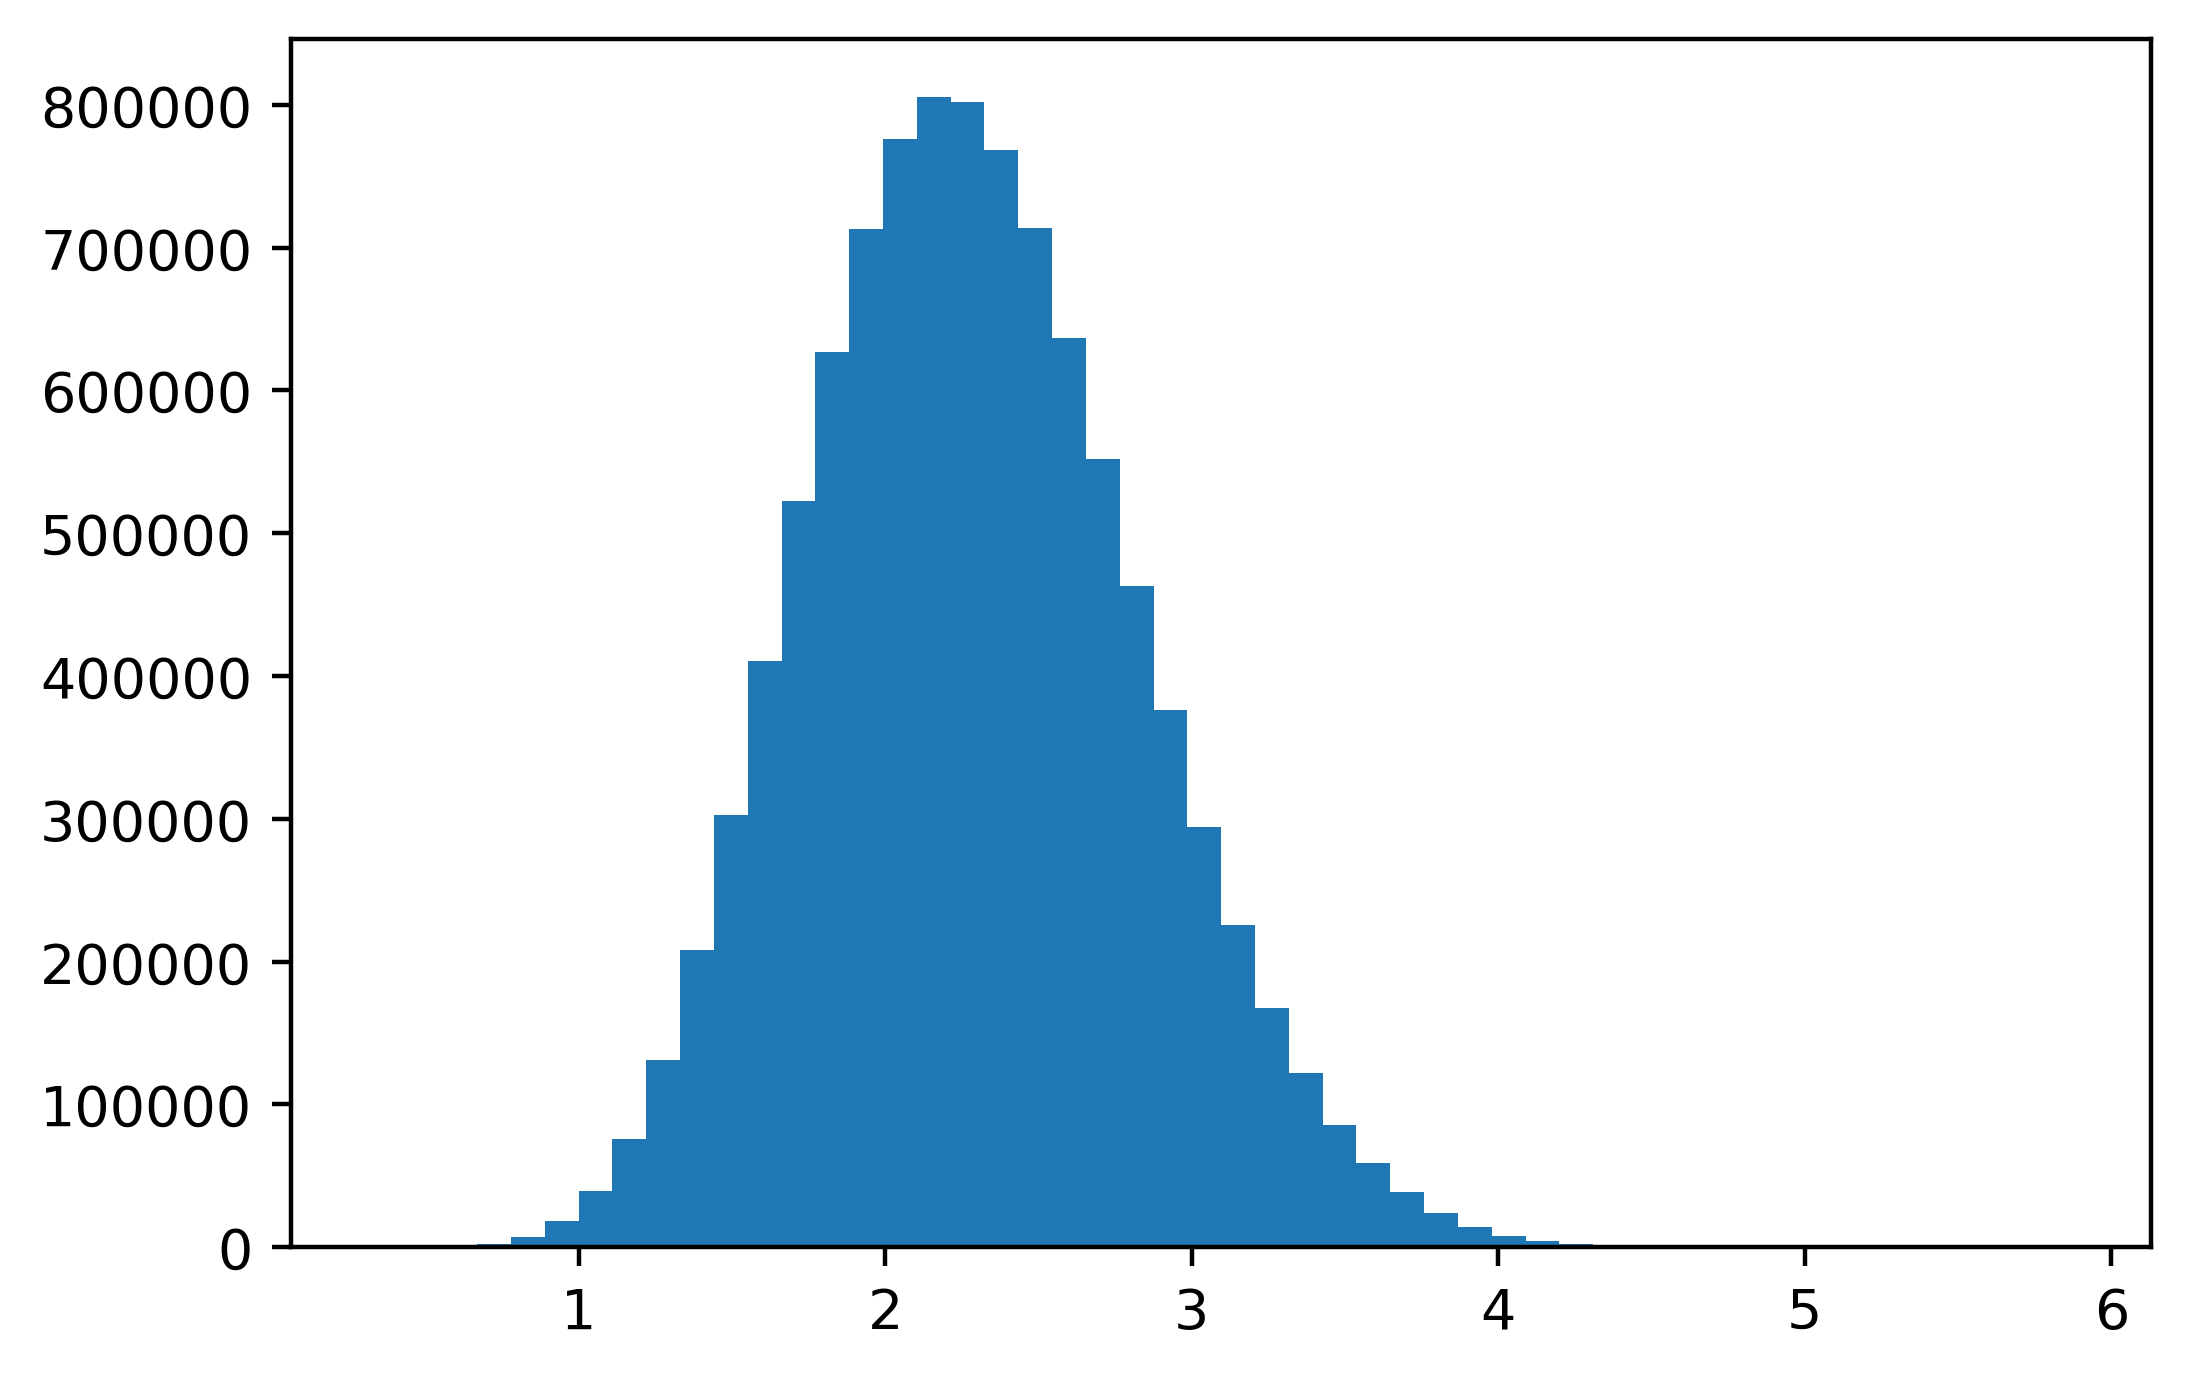

In [201]:
plt.hist(hashed_norms, bins=50)

In [205]:
np.mean(sift_hashed, axis=0), np.cov(sift_hashed, rowvar=False)

(array([ 0.0043549 , -0.00204538,  0.00247353,  0.00154396,  0.00657582,
        -0.00387138, -0.00101169,  0.00201422, -0.00438944, -0.01193595]),
 array([[ 0.44760731, -0.05554474, -0.10012874, -0.08510813,  0.00400026,
         -0.08242992, -0.10052789,  0.02741912,  0.10653229, -0.00261189],
        [-0.05554474,  0.36507485,  0.02518869,  0.05546639,  0.0435155 ,
          0.03919901,  0.09725241, -0.17096033, -0.01044507, -0.0129828 ],
        [-0.10012874,  0.02518869,  0.49411242, -0.12544257,  0.20822345,
          0.03680308,  0.06332851, -0.06977663, -0.09511186,  0.04542662],
        [-0.08510813,  0.05546639, -0.12544257,  0.51578904, -0.03588769,
          0.06703212,  0.19692624, -0.11660021, -0.0526512 , -0.0859982 ],
        [ 0.00400026,  0.0435155 ,  0.20822345, -0.03588769,  0.47776629,
          0.04594565, -0.04619954, -0.12112661, -0.01856618,  0.02691554],
        [-0.08242992,  0.03919901,  0.03680308,  0.06703212,  0.04594565,
          0.58465002,  0.26106101

In [206]:
np.linalg.eig(np.cov(sift_hashed, rowvar=False))

(array([1.4182639 , 0.90222889, 0.79572821, 0.63594589, 0.16000972,
        0.22317876, 0.28522347, 0.33758432, 0.39525491, 0.37504757]),
 array([[-0.12858185,  0.28496759, -0.07834974,  0.36366381,  0.19664427,
          0.18397791,  0.3563577 , -0.42706432, -0.59317336,  0.17356241],
        [ 0.17492912, -0.16140811,  0.01671241,  0.20215931,  0.0786869 ,
          0.13060414,  0.77848617,  0.48497127,  0.19399333,  0.00889959],
        [ 0.11406144, -0.12274099,  0.63449176, -0.08215548,  0.56251481,
          0.12493051,  0.02877821, -0.36400603,  0.3052973 ,  0.06348038],
        [ 0.18204128, -0.35086496, -0.44957718, -0.0035422 ,  0.34276267,
          0.33696757, -0.0865743 , -0.13409897, -0.06859727, -0.61677057],
        [ 0.10364438, -0.0443414 ,  0.53922135,  0.22865278, -0.45553513,
         -0.08589251,  0.07305885, -0.08550132, -0.22414682, -0.60536788],
        [ 0.43955943,  0.10494505,  0.02626617, -0.46641838,  0.28311917,
         -0.50964782,  0.1241301 ,  0.14113

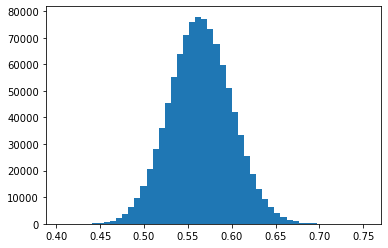

In [10]:
rng = np.random.default_rng()
datar = rng.normal(size=(1000000, 128)) / 20
rand_norms = np.linalg.norm(datar, axis=1)
plt.hist(rand_norms, bins=50)
plt.show()